# Australian  Beverage Company Retail Forecasting

## Business Understanding

### Overview

Company XYZ is an Australian based beverage company.They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality.

At the time, they were using their own software, written in-house, but it often produced forecasts that did not seem sensible. Company wanted to explore power of AI/ML based forecasting to replace their in house local solution.The project will be based on using time series forecasting using Machine Learning algorithms.We will forecast the retail for future periods.

Retail forecasting helps in maintaining a good stock inventory management .Where by we are able to know the demand by forecasting and therefore we can maintain a optimum inventory level for avoid stockouts therefore the customers loyalty is maintain by finding their required products always ready.Retail forecasting also aids in avoid wastage by having excess amounts of stock the resources could used in another productive way to increase revenue in an efficient way.Reducing stockouts and reducing wastage increases the amount of profit for the business.

The Project success criteria will be a forecast accuracy of 90% meaning that the forecast error is than 10% of the actual sales.

### Problem Statement
 Inaccurate forecasting can lead to overstocking or understocking of products, which can result in lost sales, increased costs, and reduced customer satisfaction. The company needs an accurate and reliable forecasting model that takes into account the various factors that influence demand and can provide timely and actionable insights to support decision-making.

### Objective

* The main objective is to forecast accurate sales
* To determine the season with the most sales
* To determine which holiday has the most sales
* To determine which month has the most sales

## Data Understanding


The data has 12 columns and 1218 rows

The data was collected from 2017 to 2020 about the sales for the Australian Company

The description for the data is found below:

 * Product: This column  refers to the unique identifier or code for a particular product.

 * Date: This column indicates the date of sale for the product.

 * Sales: This column shows the total sales revenue generated by the product on the given date.

 * Price Discount (%): This column indicates the percentage discount that was applied to the product's price at the time of sale.

 * In-Store Promo: This column indicates whether there was a promotion or discount offered specifically for in-store purchases.

 * Catalogue Promo: This column indicates whether there was a promotion or discount offered through a catalogue or other print or digital media.

 * Store End Promo: This column indicates whether there was a promotion or discount offered specifically at the end of a store's promotional period.

 * Google_Mobility: This column is a measure of the relative mobility or foot traffic in the area surrounding the store where the product was sold, based on Google's location data.

 * Covid_Flag: This column  indicates whether there were any COVID-related restrictions or concerns in effect on the date of sale.

 * V_DAY: This column  indicates whether the date of sale was close to or on Valentine's Day.

 * EASTER: This column  indicates whether the date of sale was close to or on Easter.

 * CHRISTMAS: This column  indicates whether the date of sale was close to or on Christmas.

In [3]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/forecasting_case_study.xlsx - Sheet1.csv')
#preview the first five rows of the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


* The Price Discount (%) column should have the percentage sign removed in the data

In [5]:
# preview the last five rows of the data
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1213,SKU6,10/18/2020,96619,54%,0,1,0,-7.56,1,0,0,0
1214,SKU6,10/25/2020,115798,52%,0,1,0,-8.39,1,0,0,0
1215,SKU6,11/1/2020,152186,54%,1,0,1,-7.43,1,0,0,0
1216,SKU6,11/8/2020,26445,44%,1,0,1,-5.95,1,0,0,0
1217,SKU6,11/15/2020,26414,44%,0,0,0,-7.20,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


* The data has 12 columns and 1218 rows
* The datatype for the columns include 3 objects, 8 integers and one float
* The date column is of object datatype it needs to be transformed to datetime
* The Easter,Christmas,Covid_Flag,V_day,In-Store Promo,Catalogue Promo,Store End Promo need to be changed from integers to boolean
* The V_Day column should be renamed to Valentines 
* The Price Discount column should be converted from object to integer after removing the percentage sign in the data

In [7]:
df.describe()

,Sales,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


* The highest sales for a product to a supermakert is 288322
* Google moblity has the lowest as -28.49 and highest of 3.9


In [8]:
# finding the number of unique values for products
print('unique values','\n',df['Product'].value_counts())

unique values 
 SKU5    204
SKU2    204
SKU4    204
SKU1    204
SKU3    204
SKU6    198
Name: Product, dtype: int64


* In terms of product class there is no class imbalance

In [9]:
df.CHRISTMAS.value_counts()

0    1195
1      23
Name: CHRISTMAS, dtype: int64

## Data Preparation

##### Data preprocessing

This will involve checking for :
* Completeness - Checking for missing values in the data
* Uniformity - Here we check for the uniformity of the data and this includes looking at the data types of the different columns and   ensuring they are are correct.we check to ensure the labels of the columns are uniform and explicit
* Consistency - Involves checking for duplicated entries in the data
* Validity - Involves checking for outliers in the data

Incase any of these are not met we will do the necessary process to make the data complete,valid,uniform and consistent

In [10]:
# renaming the V_Day column to Valentines
df.rename(columns={'V_DAY':'VALENTINES'},inplace=True)

In [11]:
# removing the percentage sign in the price discount column
df['Price Discount (%)']=df['Price Discount (%)'].map(lambda x: x.strip('%'))

In [12]:
# checking to see whether the % signshave been removed
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17,0,0,0,0.0,0,0,0,0


#### Checking for missing values

In [13]:
### check whether they are missing values
df.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
VALENTINES            0
EASTER                0
CHRISTMAS             0
dtype: int64

There are no missing values in the data

#### Checking for consistency

In [14]:
# this invovles checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data

#### Checking for uniformity

In [15]:
# converting date columns to datetime
df['date']=pd.to_datetime(df['date'])


In [16]:
# converting the integers to boolean
list1=['Catalogue Promo','In-Store Promo','Store End Promo','CHRISTMAS','VALENTINES','EASTER','Covid_Flag']
for all in list1:
    df[all]=df[all].astype('int')
# converting the price discount column to an integer
df['Price Discount (%)']=df['Price Discount (%)'].astype(int)
# checking to see whether they are boolean
df.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)             int32
In-Store Promo                 int32
Catalogue Promo                int32
Store End Promo                int32
Google_Mobility              float64
Covid_Flag                     int32
VALENTINES                     int32
EASTER                         int32
CHRISTMAS                      int32
dtype: object

#### Checking for validity

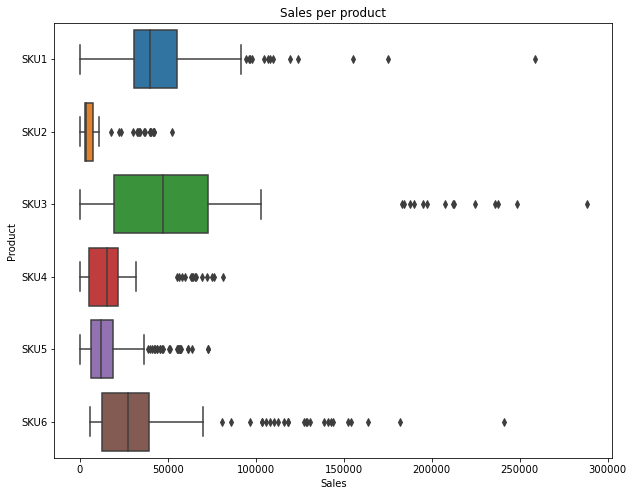

In [17]:
# cheking the distribution of sales for each product
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Sales',y='Product')
plt.title('Sales per product')
plt.show()

The outliers seem genuine due to seasonality trend so they will remain in the data 

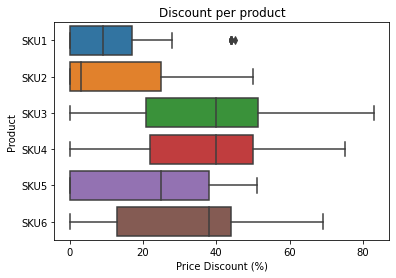

In [18]:
# checking for the distribution of discount per product
sns.boxplot(data=df,x='Price Discount (%)',y='Product')
plt.title('Discount per product')
plt.show()

The outliers seem genuine so they will remain in the data

#### Feature Engineering

* We will create new columns to help build the accuracy for the model
* The new columns will include:

Month

Year

Day of the week
 
Australian Day

Anzac Day

Seasons

In [19]:
# creating the month column
df['month']=df['date'].apply(lambda x: x.strftime('%b'))
# creating the year column
df['year']=df['date'].apply(lambda x: x.strftime('%Y'))
# creating the day of the week column
df['day']=df['date'].apply(lambda x: x.strftime('%A'))

In [20]:
# preview the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday
1,SKU1,2017-02-12,29023,0,1,0,1,0.0,0,1,0,0,Feb,2017,Sunday
2,SKU1,2017-02-19,45630,17,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday
3,SKU1,2017-02-26,26789,0,1,0,1,0.0,0,0,0,0,Feb,2017,Sunday
4,SKU1,2017-03-05,41999,17,0,0,0,0.0,0,0,0,0,Mar,2017,Sunday


In [21]:
# Knowing start time and end time for the data
from dateutil.relativedelta import relativedelta
df.sort_values(by='date',inplace=True)
StartDate=df['date'].iloc[0]
EndDate=df['date'].iloc[-1]
Duration_taken_in_days=EndDate - StartDate
difference=relativedelta(EndDate,StartDate)
# preview the data to know 
print(f'The date starts from {StartDate} to {EndDate}')
print('The duration for the sales is',difference.years,'years',difference.months,'months',difference.days,'days')

The date starts from 2017-02-05 00:00:00 to 2020-12-27 00:00:00
The duration for the sales is 3 years 10 months 22 days


In [22]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,1,0,0,-6.95,1,0,0,0,Dec,2020,Sunday


In [23]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,1,0,1,-6.95,1,0,0,0,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,0,0,0,-6.95,1,0,0,0,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,1,0,0,-6.95,1,0,0,0,Dec,2020,Sunday


In [24]:
# can we create a season column for all the seasons
# lets create a dictionary containing each month and its season
season={
    'January':'Summer',
    'February':'Summer',
    'March':'Autumn',
    'April': 'Autumn',
    'May':'Autumn',
    'June':'Winter',
    'July':'Winter',
    'August':'Winter',
    'September':'Spring',
    'October':'Spring',
    'November':'Spring',
    'December':'Summer'
}
df['Seasons']=df['date'].apply(lambda x: x.strftime('%B')).map(season)

In [25]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer


In [26]:
# lets create the column for most popular holidays in Australia according to  McCrindle Research Pty Ltd 
# this shows the day of the holiday and two days close to the holiday
# Austrialia day
df['Australia_day'] =  df['date'].apply(lambda x: (x.strftime('%m-%d')== '01-26')|(x.strftime('%m-%d')=='01-27')|(x.strftime('%m-%d')=='01-25'))
# Anzac day
df['Anzac_day'] = df['date'].apply(lambda x: (x.strftime('%m-%d')== '04-25')|(x.strftime('%m-%d')=='04-26')|(x.strftime('%m-%d')=='04-24'))

In [27]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons,Australia_day,Anzac_day
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,Feb,2017,Sunday,Summer,False,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 203
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   int32         
 4   In-Store Promo      1218 non-null   int32         
 5   Catalogue Promo     1218 non-null   int32         
 6   Store End Promo     1218 non-null   int32         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int32         
 9   VALENTINES          1218 non-null   int32         
 10  EASTER              1218 non-null   int32         
 11  CHRISTMAS           1218 non-null   int32         
 12  month               1218 non-null   object        
 13  year                1218 non-null   object       

In [29]:
#finding out the number of days used for sales
df['day'].value_counts() 

Sunday    1218
Name: day, dtype: int64

The day for sale was only on Sunday

## Data Analysis

The section is divided into analysis  and time series analysis
We will first look at:
* Distribution of sales
* Distribution of google mobility
* Distribution of Price Discount
* Total sales per year
* Total sales per month per year
* Average sales per month
* Total sales per season per year
* Average sales per season
* Total Sales per holiday per year
* Difference between Sales in covidflag and those without
* Heatmap for checking for multicollinearity
* line plot for google mobility
* Time Series visualizations:
     * 


#### Distributions

<AxesSubplot:xlabel='Sales', ylabel='Density'>

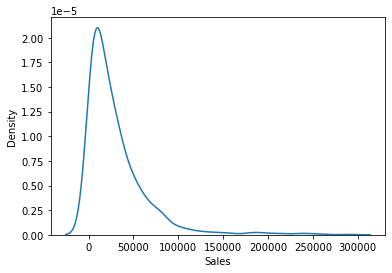

In [30]:
# distribution of sales
sns.kdeplot(data=df,x=df['Sales'])

The Sales column is skewed to the right due to seasonalities we will account for seasonality through seasonal decomposition

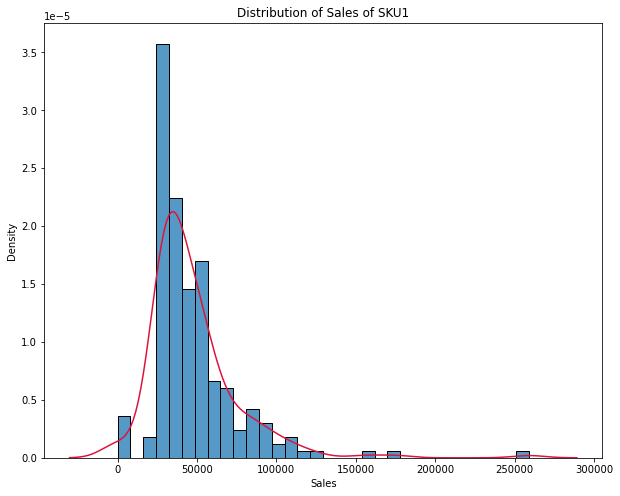

In [31]:
# distribution of sales of product SKU1
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.histplot(data = df,x=(df['Sales'].loc[df['Product']=='SKU1']),kde=False,stat='density')
sns.kdeplot(data=df,x=(df['Sales'].loc[df['Product']=='SKU1']),ax=ax,color='crimson')
plt.title('Distribution of Sales of SKU1')
plt.show()

In [32]:
def distribute_product(product):
    """Creating a function to come up with the distribution
    for the products"""
    fig,ax=plt.subplots(figsize=(10,8))
    ax=sns.histplot(data=df,x=df['Sales'].loc[df['Product']==product],stat='density')
    sns.kdeplot(data=df,x=df['Sales'].loc[df['Product']==product],color='crimson',ax=ax)
    plt.title(f'Distribution of Sales of {product}')
    plt.show()

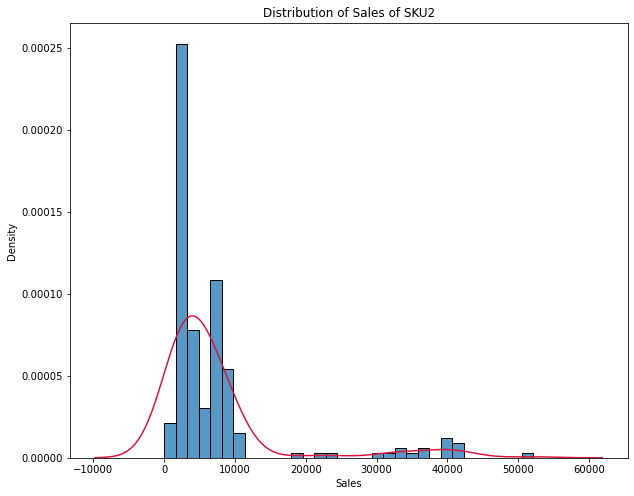

In [33]:
# plotting the distribution of sales of product SKU2
distribute_product('SKU2')

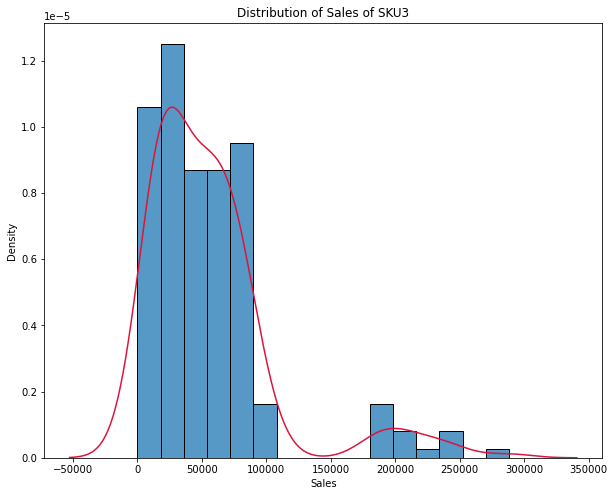

In [34]:
# plotting the distribution of Sales for product SKU3
distribute_product('SKU3')

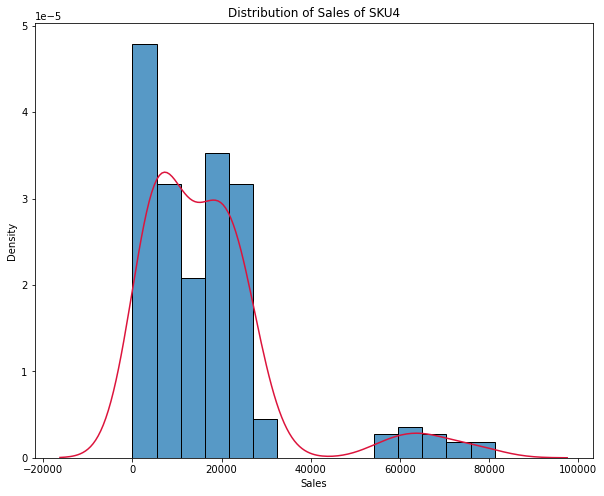

In [35]:
distribute_product('SKU4')

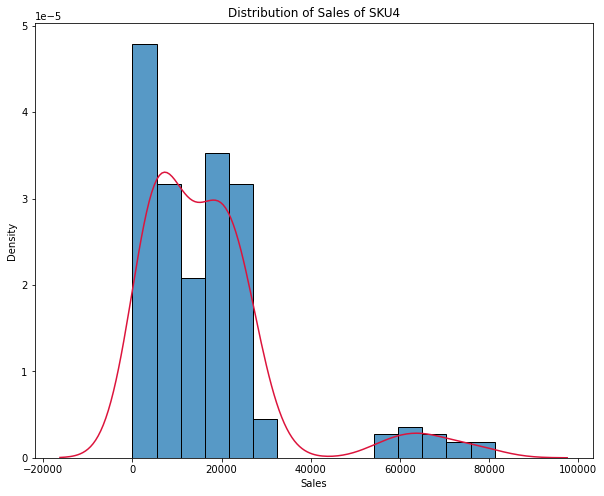

In [36]:
distribute_product('SKU4')

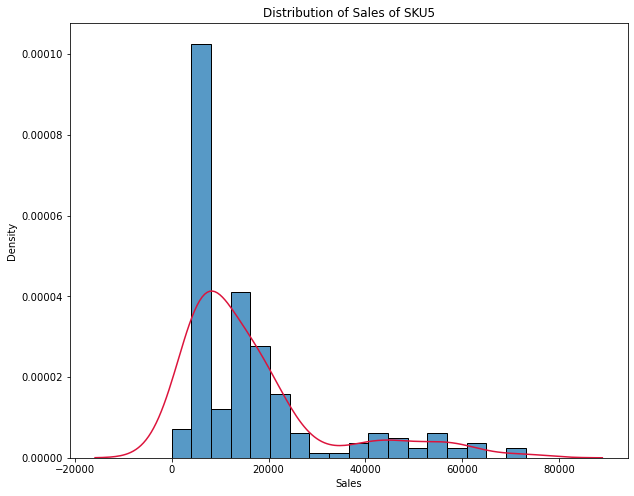

In [37]:
distribute_product('SKU5')

The data is skewed to right

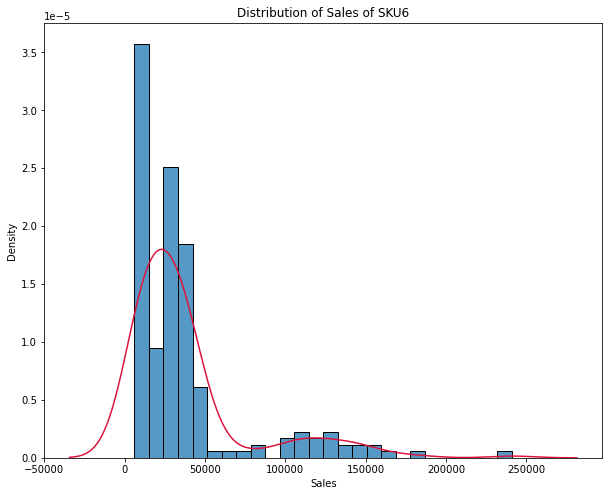

In [38]:
distribute_product('SKU6')

The data is skewed to the right

Text(0.5, 0, 'Years')

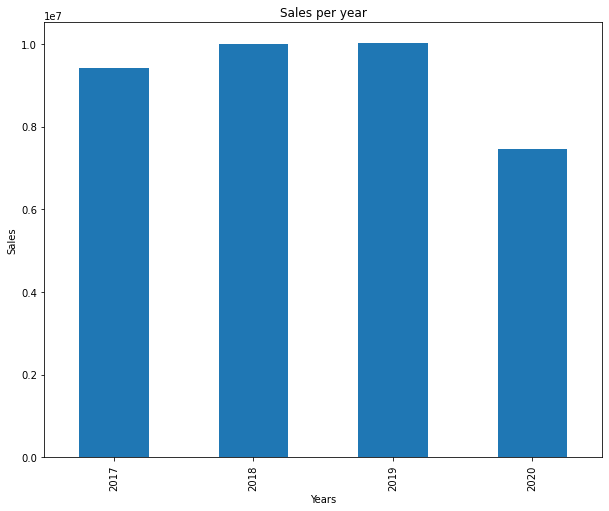

In [39]:
# lets create a barplot for the total sales per year
fig,ax=plt.subplots(figsize=(10,8))
ax=df.groupby('year')['Sales'].sum().plot(kind='bar')
ax.set_title('Sales per year')
ax.set_ylabel('Sales')
ax.set_xlabel('Years')

* 2020 had the least sales
* 2018 and 2019 has the most sales

In [40]:
# lets create a barplot for total sales per product per year
new_data=df.groupby(['year','Product'])['Sales'].sum()

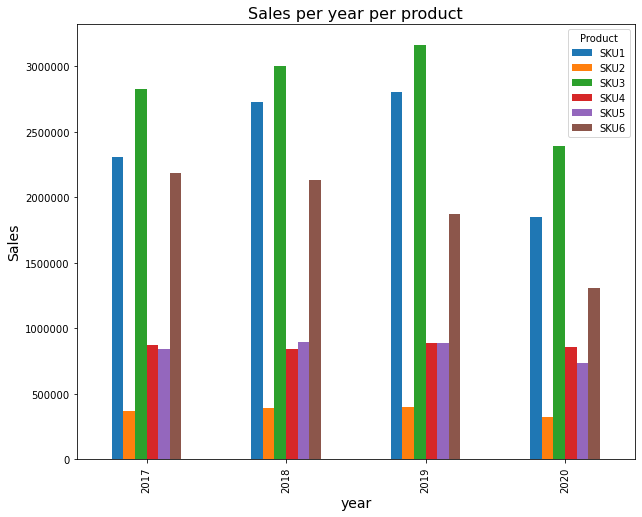

In [41]:
# barplot for total sales per product per year
fig,ax=plt.subplots(figsize=(10,8))
df_product_pr_year=df.groupby(['year','Product'])['Sales'].sum()
df_product_pr_year.unstack().plot(kind='bar',ax=ax)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Sales per year per product',fontsize=16)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('year',fontsize=14)
plt.show()

*	SKU1 and SKU3 had the highest sales in all the years
*	SKU2 has the lowest sales in all the years
*	SKU6 had the third highest Sales in all the years


<AxesSubplot:xlabel='month'>

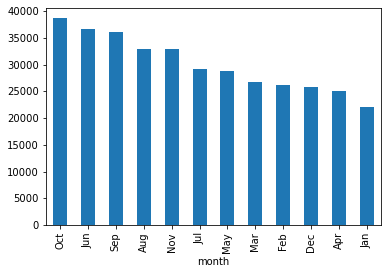

In [42]:
#calculating the average sales per month
df_month=df.groupby('month')['Sales'].mean().sort_values(ascending=False)
df_month.plot(kind='bar')

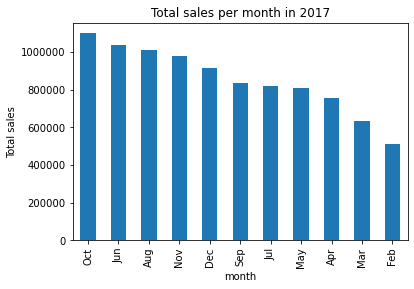

In [43]:
#Calculating the total sales per month per year
df_2017=df.loc[(df['year'] == '2017')].groupby('month')['Sales'].sum().sort_values(ascending=False)
df_2017.plot(kind='bar')
plt.title('Total sales per month in 2017')
plt.ylabel('Total sales')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [44]:
# creating a function to calculate the total sales per month of each year
def total_sale(year):
    """function for calculating the total sales for each year by month"""
    df_year=df.loc[(df['year'] == year)].groupby('month')['Sales'].sum().sort_values(ascending=False)
    df_year.plot(kind='bar')
    plt.title(f'Total sales per month in {year}')
    plt.ylabel('Total sales')
    plt.ticklabel_format(style='plain',axis='y')
    plt.show()

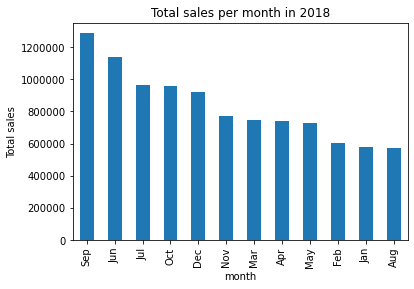

In [45]:
# calculating sales in 2018
total_sale('2018')

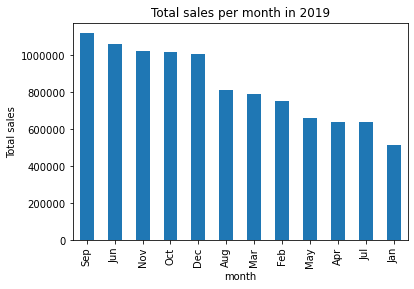

In [46]:
# calculating total sales in 2019
total_sale('2019')

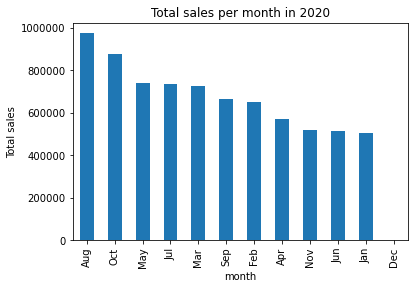

In [47]:
# calculating total sales in 2020
total_sale('2020')

* August has the highest sales  in 2020
* January has the second least sales in 2020
* December has the least sales

In [48]:
# calculating total sales per season per year
# creating a function to show total sales per season
def season_sale(year):
    """function showing total sales per season
      in each year"""
    df_season=df.loc[df['year']== year].groupby('Seasons')['Sales'].sum().sort_values(ascending=False)
    df_season.plot(kind='bar')
    plt.ticklabel_format(style='plain',axis='y')
    plt.title(f'Sales per season in {year}')
    plt.ylabel('Total sales')
    plt.show()

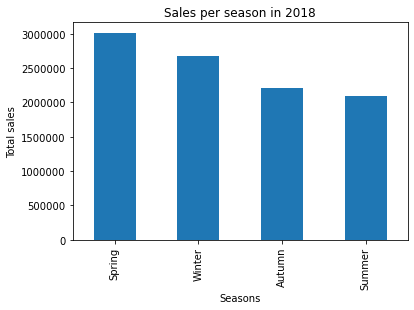

In [49]:
season_sale('2018')

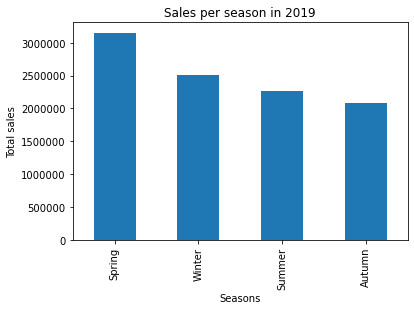

In [50]:
season_sale('2019')

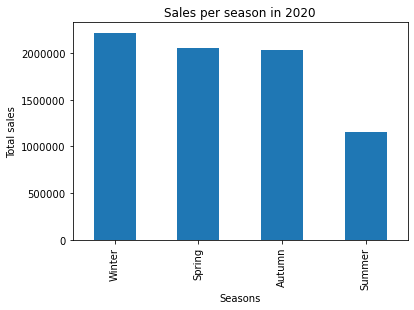

In [51]:
season_sale('2020')

* Winter has the highest sales in terms of season
* Summer has the least sales in 2020


In [52]:
# calculating total sales of a product per season in each year
# lets create a function showing total sales per season per product
def season_product(year):
    df_season2=df.loc[df['year']== year].groupby(['Seasons','Product'])['Sales'].sum()
    df_season2.unstack().plot(kind='bar')
    plt.ticklabel_format(style='plain',axis='y')
    plt.title(f'Sales per season in {year}')
    plt.ylabel('Total sales')
    plt.show()

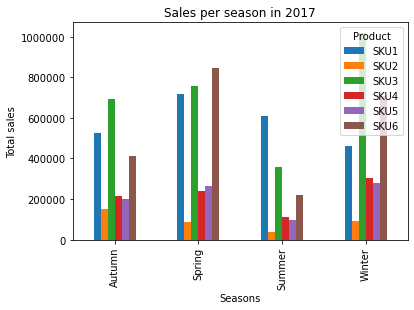

In [53]:
season_product('2017')

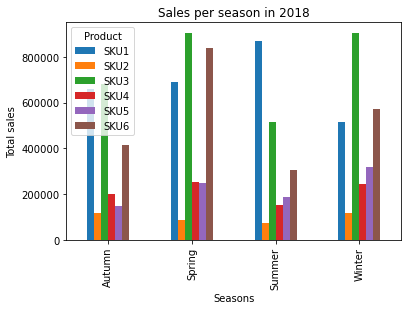

In [54]:
season_product('2018')

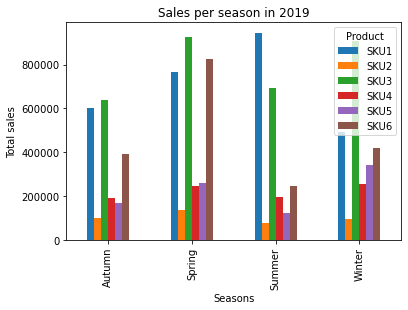

In [55]:
season_product('2019')

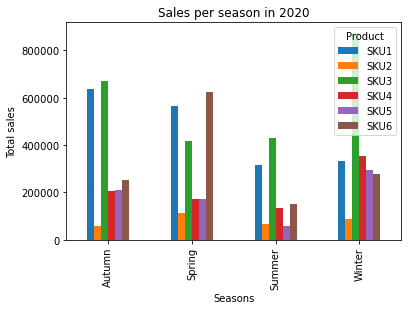

In [56]:
season_product('2020')


* SKU6 has the hihest sales in spring in 2020
* SKU3 has the highest sales in winter  and summerin 2020
* SKU2 has least sales in 2020  

<AxesSubplot:xlabel='year'>

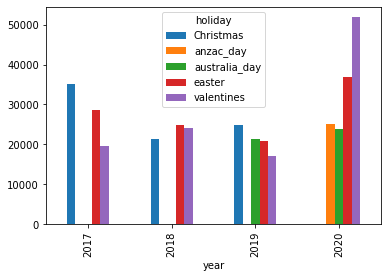

In [57]:
# lets find out the sales per holiday per year
df['holiday']='Normal day'
df.loc[(df['VALENTINES']==True),'holiday'] = 'valentines'
df.loc[(df['Anzac_day']==True),'holiday'] = 'anzac_day'
df.loc[(df['Australia_day']==True),'holiday'] = 'australia_day'
df.loc[(df['EASTER']==True),'holiday'] = 'easter'
df.loc[(df['CHRISTMAS']==True),'holiday'] = 'Christmas'

df_holidays=df.loc[df['holiday'] != 'Normal day']
df_holidays.groupby(['year','holiday'])['Sales'].mean().unstack().plot(kind='bar')


* Valentines has the highest sales in 2020
* Easter has the second highest sales in 2020

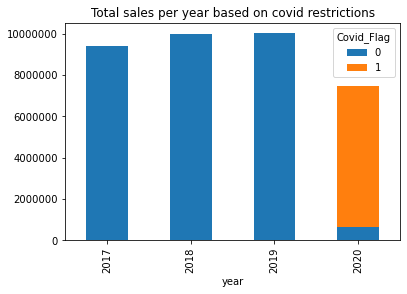

In [58]:
#showing the total sales per month in 2020
df.groupby(['year','Covid_Flag'])['Sales'].sum().unstack().plot(kind='bar',stacked=True)
plt.title('Total sales per year based on covid restrictions')
plt.ticklabel_format(style='plain',axis='y')
plt.show()


<AxesSubplot:xlabel='Google_Mobility', ylabel='Density'>

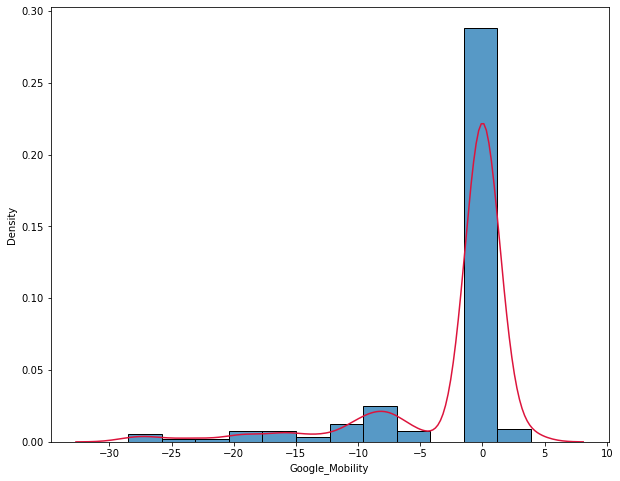

In [59]:
#plotting the distribution of google mobility
fig,ax=plt.subplots(figsize=(10,8))
sns.histplot(x='Google_Mobility',data=df,ax=ax,stat='density')
sns.kdeplot(x='Google_Mobility',data=df,ax=ax,color='crimson')

The data is skewed to the left

Text(0.5, 1.0, 'Movement of people based on google maps')

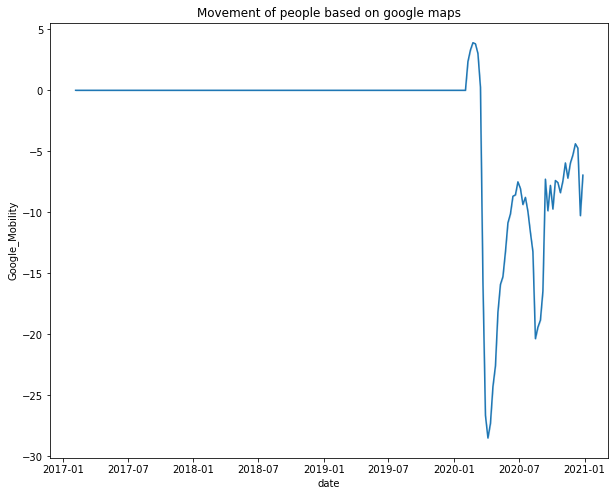

In [60]:
# lets create a lineplot for google mobility
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=df['date'],y=df['Google_Mobility'],data=df)
ax.set_title('Movement of people based on google maps')

This shows that there is a decrease in movement of people between February 2020 to June 2020 followed by an increase in the movement of individuals there is also a decrease in the movement of people starting August 2020

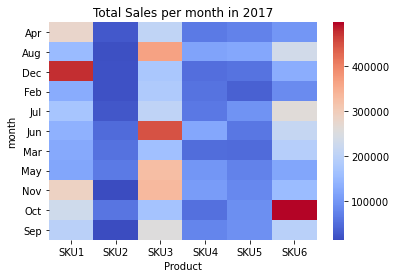

In [61]:
# showing the sales of products per month
sales_by_date=df.loc[(df['year']=='2017')].pivot_table(index='month',columns='Product',values='Sales',aggfunc='sum')
sns.heatmap(sales_by_date,cmap='coolwarm')
plt.title('Total Sales per month in 2017')
plt.show()

In [62]:
def month_sales(year,colors):
    """shows the total sales per month in
       various years """
    sales_by_date=df.loc[(df['year']== year)].pivot_table(index='month',columns='Product',values='Sales',aggfunc='sum')
    sns.heatmap(sales_by_date,cmap= colors)
    plt.title(f'Total Sales per month in {year}')
    plt.show()

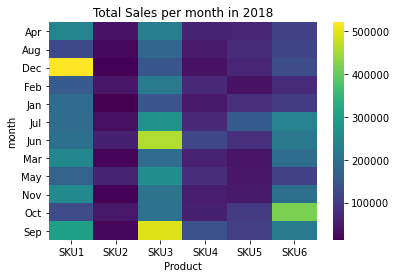

In [63]:
month_sales(year='2018',colors='viridis')

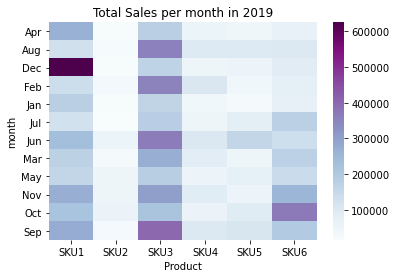

In [64]:
month_sales(year='2019',colors='BuPu')

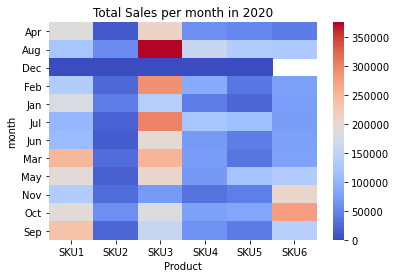

In [65]:
month_sales(year='2020',colors='coolwarm')

* SKU3 has the highest sales in August and February
* SKU6 has the highest sales in October 2020
* December had the least sales in 2020


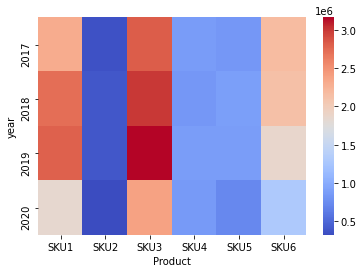

In [66]:
#plotting the sales per year
sales_by_year=df.pivot_table(index='year',columns='Product',values='Sales',aggfunc='sum')
sns.heatmap(sales_by_year,cmap='coolwarm')
plt.show()

### Time series analysis
* Line plot for each year separately
* Line plot for each year on the same graph
* Histogram for each year
* density plot for each year on the same graph
* Box and whisker plot for each year

Text(0.5, 0, 'date')

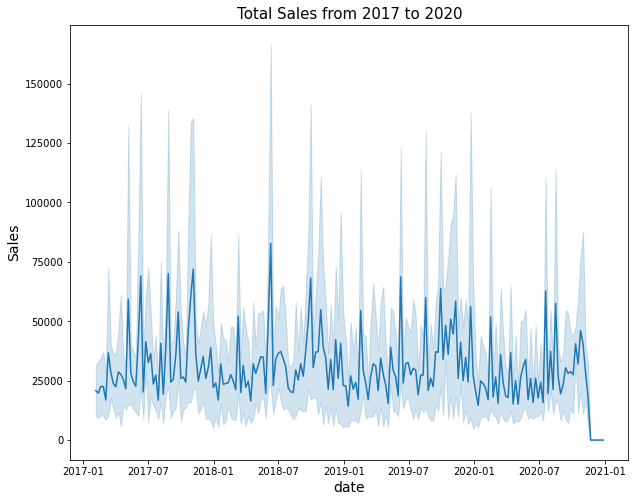

In [67]:
#creating a lineplot for sales of all products
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=df['date'],y='Sales',ax=ax,data=df)
plt.title('Total Sales from 2017 to 2020',fontsize=15)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('date',fontsize=14)

* There is a hike in sales around July every year 
* There is downward trend in sales around September in 2020
* The sales have a constant trend


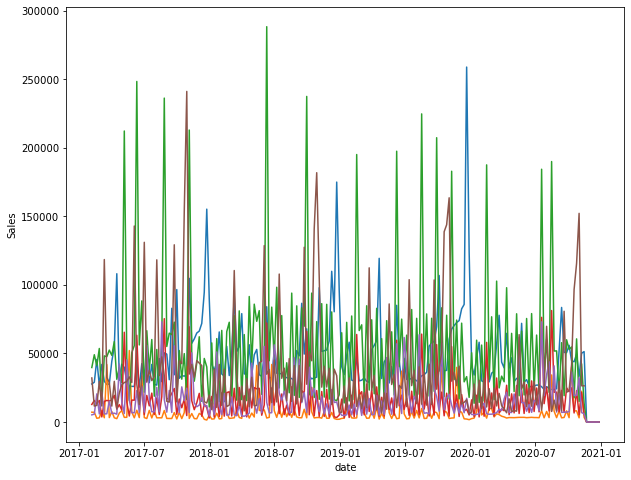

In [68]:
#creating a lineplot for each product
product=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
fig,ax=plt.subplots(figsize=(10,8))
for all in product:
    sns.lineplot(x='date',y='Sales',data=df.loc[df['Product']== all],legend=True)

In [69]:
year_group = df.loc[df['Product']=='SKU1'].set_index('date').groupby(pd.Grouper(freq='A'))
year_group1=year_group[['Sales']]
year_group1.head()


,Sales
date,
2017-02-05,27750
2017-02-12,29023
2017-02-19,45630
2017-02-26,26789
2017-03-05,41999
2018-01-07,41941
2018-01-14,37845
2018-01-21,43324
2018-01-28,65691


In [70]:
year_group1.tail()

,Sales
date,
2017-12-03,66333
2017-12-10,71917
2017-12-17,94633
2017-12-24,155253
2017-12-31,89706
2018-12-02,59037
2018-12-09,109917
2018-12-16,80431
2018-12-23,174994


#### Product SKU1

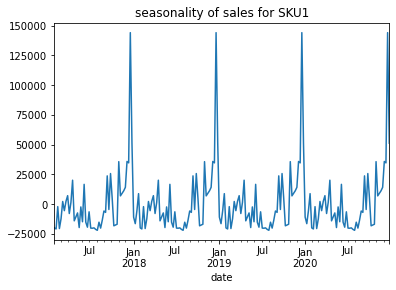

In [71]:
# plotting the seasonality of sales of SKU1
from statsmodels.tsa.seasonal import seasonal_decompose
season_df=df.loc[df['Product']=='SKU1'][['date','Sales']].set_index('date')
#season_df=season_df.asfreq('W')
season_decomp=seasonal_decompose(season_df)
season_decomp.seasonal.plot()
plt.title('seasonality of sales for SKU1')
plt.show()

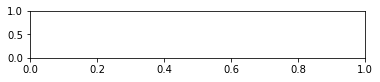

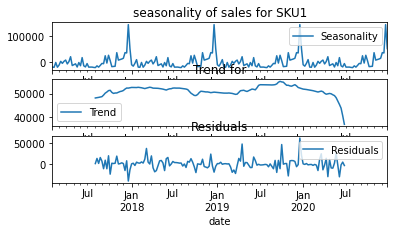

In [72]:
# creating a function for seasonal_decompose
# def plot_seasonal_decompose(product):
season_df=df.loc[df['Product']=='SKU1'][['date','Sales']].set_index('date')
season_decomp=seasonal_decompose(season_df)
# plotting the original timeseries
plt.subplot(411)
season_df.plot(label='Original')
plt.title('Original data')
plt.legend(loc='best')
# plotting the seasonality timeseries
plt.subplot(412)
season_decomp.seasonal.plot(label='Seasonality')
plt.title('seasonality of sales for SKU1')
plt.legend(loc='best')
# plotting the trend
plt.subplot(413)
season_decomp.trend.plot(label='Trend')
plt.legend(loc='best')
plt.title('Trend for')
# plotting the noise(residuals)
plt.subplot(414)
season_decomp.resid.plot(label='Residuals')
plt.title('Residuals')
plt.legend(loc='best')
plt.show()

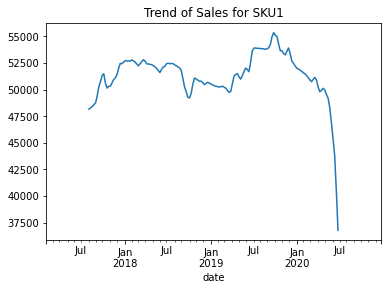

In [73]:
# plotting the trend of sales for SKU1
season_decomp.trend.plot()
plt.title('Trend of Sales for SKU1')
plt.show()

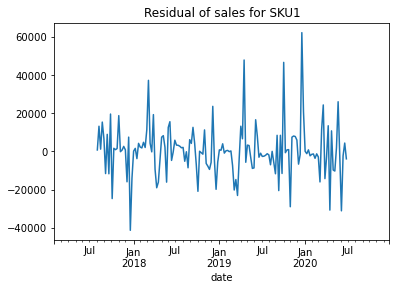

In [74]:
season_decomp.resid.plot()
plt.title('Residual of sales for SKU1')
plt.show()

In [75]:
# checking for stationarity
# alpha = 0.05
from statsmodels.tsa.stattools import adfuller
adf=adfuller(season_df)
adf_results=pd.Series(adf[0:4],index=['Test Statistic','p value','number of lags','number of observations'])
for key,value in adf[4].items():
    adf_results['Critical value (%s)'%key] = value

if adf_results['p value'] < 0.05:
    print('We reject the null hypothesis\nThe data is stationary')
elif adf_results['p_value'] > 0.05:
    print('Do not reject the null hypothesis\nconclude that the data is non stationary')

We reject the null hypothesis
The data is stationary


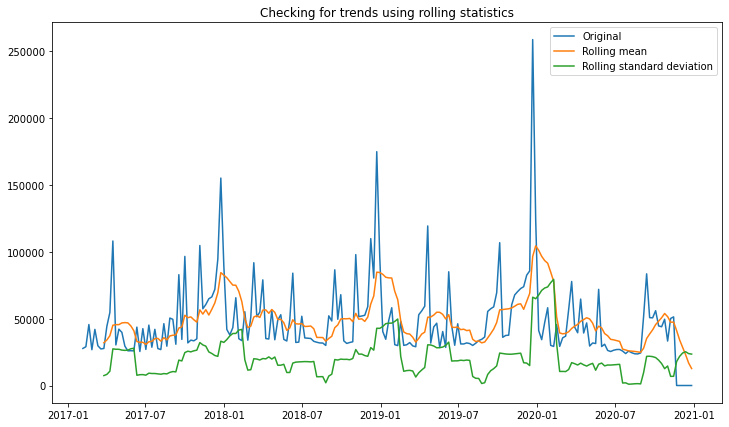

In [76]:
# checking for trends using the rolling means
roll_mean=season_df.rolling(window=8).mean()
roll_std=season_df.rolling(window=8).std()
fig,ax=plt.subplots(figsize=(12,7))
plt.plot(season_df,label='Original')
plt.plot(roll_mean,label='Rolling mean')
plt.plot(roll_std,label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Checking for trends using rolling statistics')
plt.show()

This shows that the data is stationary 

In [77]:
# creating a function for checking for statinarity
def stationarity_check():
    """Function for checking whether the timeseries 
       is stationary or non-stationary"""
    # plotting to check for trends
    roll_mean=season_df.rolling(window=8).mean()
    roll_std=season_df.rolling(window=8).std()
    fig,ax=plt.subplots(figsize=(12,7))
    plt.plot(season_df,label='Original')
    plt.plot(roll_mean,label='Rolling mean')
    plt.plot(roll_std,label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Checking for trends using rolling statistics')
    plt.show()
    # checking for stationarity
    # alpha = 0.05
    from statsmodels.tsa.stattools import adfuller
    adf=adfuller(season_df)
    adf_results=pd.Series(adf[0:4],index=['Test Statistic','p value','number of lags','number of observations'])
    for key,value in adf[4].items():
       adf_results['Critical value (%s)'%key] = value

    if adf_results['p value'] < 0.05:
       print('We reject the null hypothesis\nThe data is stationary')
    elif adf_results['p_value'] > 0.05:
       print('Do not reject the null hypothesis\nconclude that the data is non stationary')

In [78]:
### data preprocessing
# using one hot encoding on the product
from sklearn.preprocessing import OneHotEncoder
# instantiate the onehotencoder
ohe=OneHotEncoder()
# create the encoded column based on the profit columnn
df_en=ohe.fit_transform(df[['Seasons']])
# it is an sparse matrix lets create a new data
df_new=pd.DataFrame(df_en.toarray(),columns=ohe.get_feature_names(['Seasons']))
# lets join the data to be used in modelling
data=pd.concat([df.drop(['Seasons','month','day','year','holiday'],axis=1),df_new],axis=1)
data.head()


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
1,SKU1,2017-02-12,29023,0,1,0,1,0.0,0,1,0,0,False,False,0.0,0.0,1.0,0.0
2,SKU1,2017-02-19,45630,17,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
3,SKU1,2017-02-26,26789,0,1,0,1,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
4,SKU1,2017-03-05,41999,17,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0


In [79]:
# lets split the data to trainset and testset
# train set is between 2017-01 and 2020-07
train_set=data.sort_values('date',ascending=True).loc[df['date']<='2020-07']
# test set is after 2020-07
test_set=data.sort_values('date',ascending=True).loc[df['date']>'2020-07']

In [80]:
train_set.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,SKU1,2017-02-05,27750,0,0,0,0,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
612,SKU4,2017-02-05,12835,30,0,1,1,0.0,0,0,0,0,False,False,0.0,0.0,1.0,0.0
408,SKU3,2017-02-05,39767,30,0,1,1,0.0,0,0,0,0,False,False,1.0,0.0,0.0,0.0
1020,SKU6,2017-02-05,32138,28,0,0,0,0.0,0,0,0,0,False,False,1.0,0.0,0.0,0.0
816,SKU5,2017-02-05,5229,0,0,0,0,0.0,0,0,0,0,False,False,0.0,1.0,0.0,0.0


### Modelling

In this section we will try out the following models:
 * ARIMA
 * ARIMAX
 * SARIMAX
 * Facebook Prophet


In [81]:

#creating a function for evaluating the models
def class_forecast_accuracy(y_true, y_pred):
    """It measures how closely the predicted values match the actual values.
       A perfect forecast accuracy score is 1, indicating that there are no errors in the forecast.
       A score of 0 means the forecast is not better than guessing, and there is no improvement in accuracy."""
    # Calculate absolute error
    abs_error = np.abs(y_true - y_pred)
    
    # Calculate weights
    weights = y_true / np.sum(y_true)
    
    # Calculate Wt. MAPE
    wt_mape = np.sum(abs_error * weights) / np.sum(y_true)

    #calculate the forecast accuracy
    forecast_accuracy= 1-wt_mape
    return forecast_accuracy


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU1 
 The mean squared error is 1350011509.4821024 
 The mean absolute error is 32457.203191526947 
 The forecast accuracy is 0.9450700260654171


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU2 
 The mean squared error is 139572725.58347714 
 The mean absolute error is 7007.508879061795 
 The forecast accuracy is 0.8914807079196998


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU3 
 The mean squared error is 3754930826.687795 
 The mean absolute error is 40884.43558111201 
 The forecast accuracy is 0.9157846462163786


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU4 
 The mean squared error is 672096496.555486 
 The mean absolute error is 17061.753095866607 
 The forecast accuracy is 0.9125733291503534


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU5 
 The mean squared error is 536720700.9803674 
 The mean absolute error is 15922.49304070221 
 The forecast accuracy is 0.9191924976263706


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU6 
 The mean squared error is 2991884425.279026 
 The mean absolute error is 39110.33202643569 
 The forecast accuracy is 0.9083803248877795
The average mean_squared_error for all the products is 1574202780.7613754 
 The average mean absolute error for all the products is 25407.287635784207
 The average forecast accuracy is 0.9154135886443333


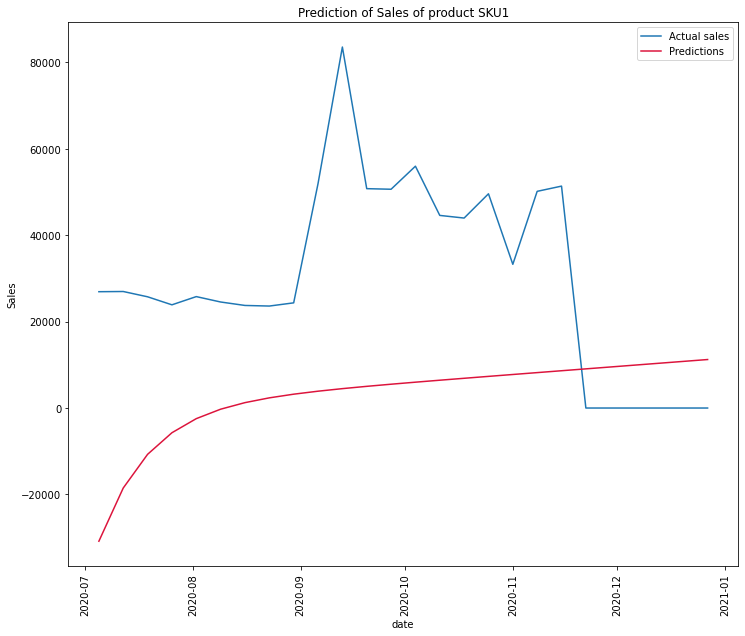

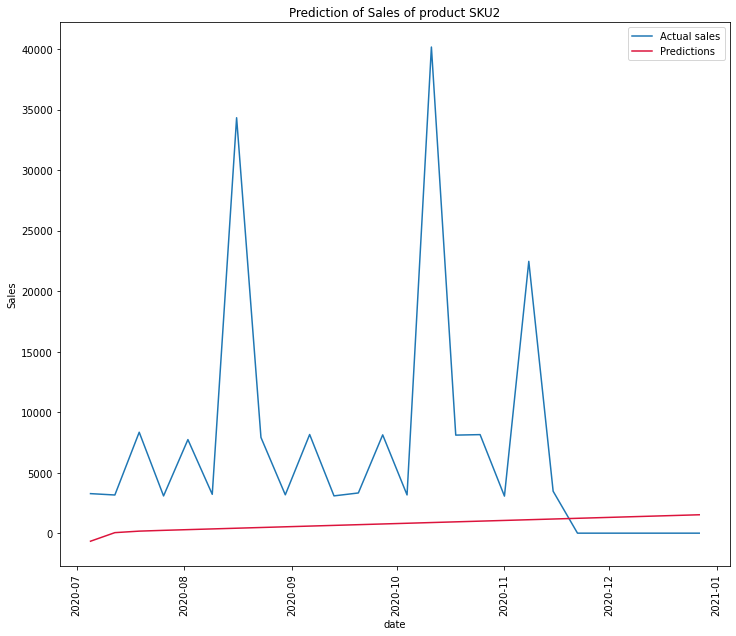

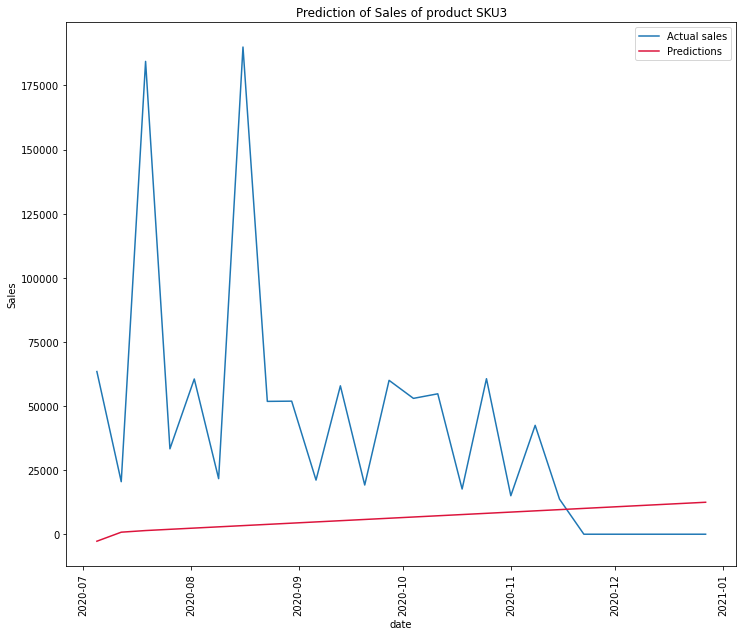

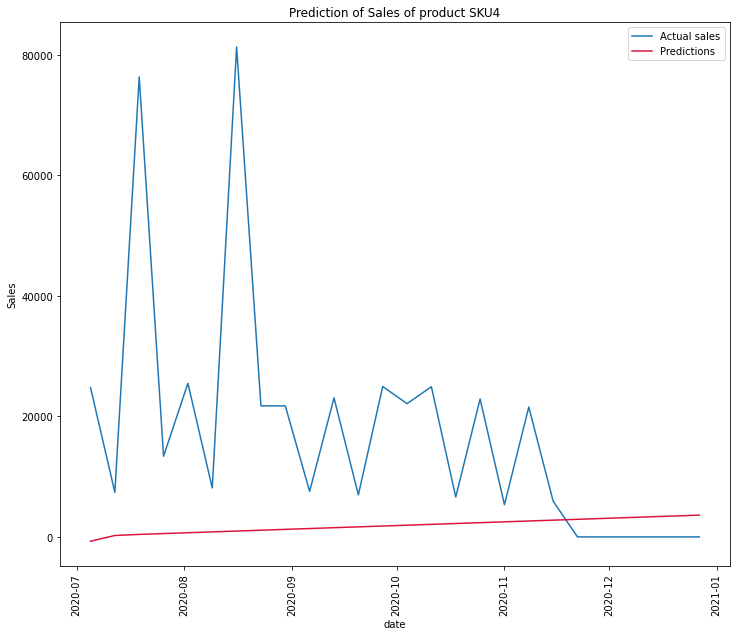

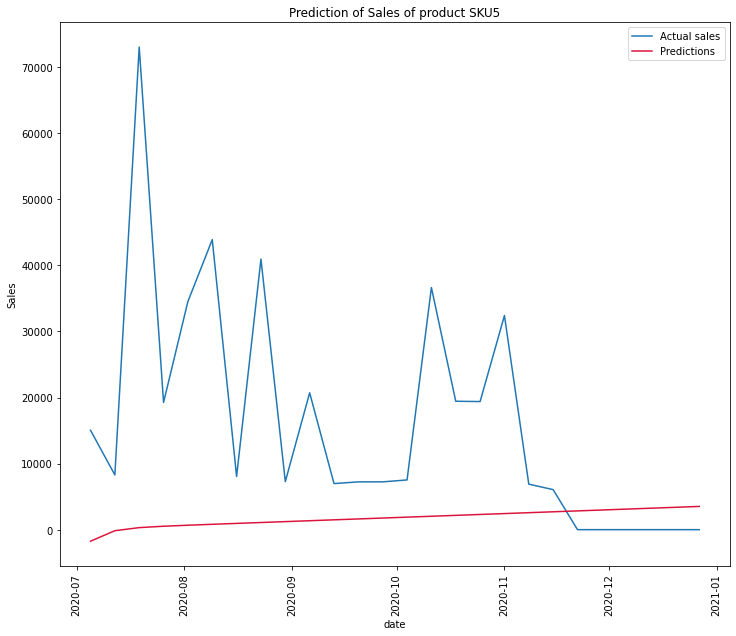

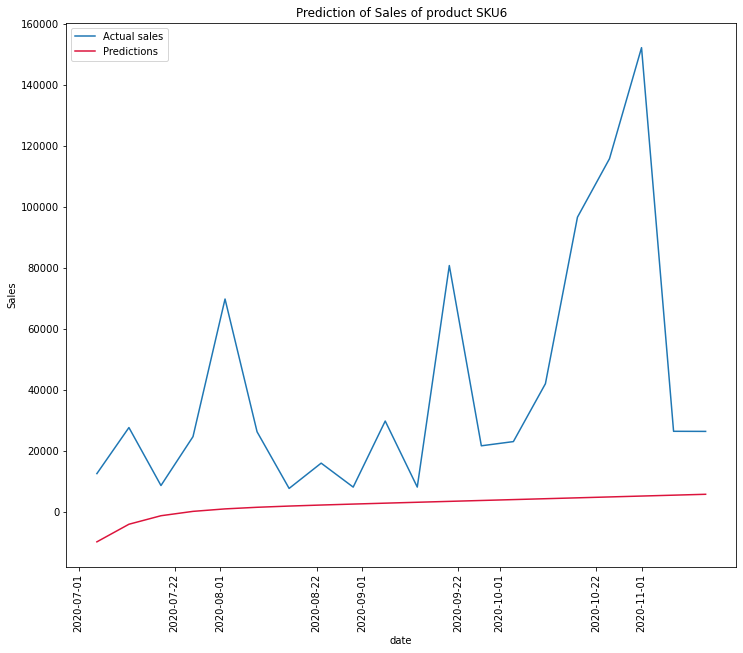

In [82]:
#import ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#creating a list of products
products=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
#creating the mean squared error,residual sum of squares error
mse=[]
mae=[]
r2_list=[]
acc_list=[]

for product in products:
    #Standardizing the training data
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    #scaled_pro_train=scaler.fit_transform(pro_train.drop('Product',axis=1))
    #scaled_train_set=pd.DataFrame(data=scaled_pro_train,columns=pro_train.drop('Product',axis=1).columns,index=pro_train.index)
    #Standardizing the test data
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    #scaled_pro_test=scaler.fit_transform(pro_test.drop('Product',axis=1))
    #scaled_test_set=pd.DataFrame(data=scaled_pro_test,columns=pro_test.drop('Product',axis=1).columns,index=pro_test.index)
    #Training the model 
    model=ARIMA(pro_train['Sales'],order=(1,0,0),trend='t').fit()
    #lets predict using the model 
    start=pro_test.index[0]
    end=pro_test.index[-1] 
    sales_pred=model.predict(start=start,end=end)
    #lets unstandardize the data
    #sales_predd=scaler.inverse_transform(sales_pred)
    #lets plot the actual data and the forecasts
    fig,ax=plt.subplots(figsize=(12,10))
    sns.lineplot(y=pro_test['Sales'],x=pro_test.index,ax=ax,label='Actual sales')
    sns.lineplot(y=sales_pred,x=pro_test.index,ax=ax,color='crimson',label='Predictions')
    plt.title(f'Prediction of Sales of product {product}')
    plt.xticks(rotation=90)
    plt.legend()
    #lets evaluate the model
    #calculating the mean_squared_error
    mean_s_e=mean_squared_error(pro_test['Sales'],sales_pred)
    mse.append(mean_s_e) 
    #calculating the mean_absolute_error
    mean_a_e=mean_absolute_error(pro_test['Sales'],sales_pred)
    mae.append(mean_a_e)
    #calculating the explained variance
    r2=r2_score(pro_test['Sales'],sales_pred)
    r2_list.append(r2)
    #calculating the forecast accuracy
    acc=class_forecast_accuracy(pro_test['Sales'],sales_pred)
    acc_list.append(acc)
    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \n The forecast accuracy is {acc}')

#creating the average for all metrics
model1_mae = np.mean(mae)
model1_mse = np.mean(mse)
model1_accuracy = np.mean(acc_list) 
print(f'The average mean_squared_error for all the products is {np.mean(mse)} \n The average mean absolute error for all the products is {np.mean(mae)}\n The average forecast accuracy is {np.mean(acc_list)}') 

c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU1 
 The mean squared error is 717696391.3738532 
 The mean absolute error is 26131.139151068306 
 The class forecast is 0.9641848578069898


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU2 
 The mean squared error is 71616667.14699122 
 The mean absolute error is 6781.064776402399 
 The class forecast is 0.9622641544553155


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU3 
 The mean squared error is 5567492645.703791 
 The mean absolute error is 71195.28187911352 
 The class forecast is 0.9441114971453604


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU4 
 The mean squared error is 459081454.28375846 
 The mean absolute error is 14781.766360667913 
 The class forecast is 0.9518493257796837


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU5 
 The mean squared error is 201377182.03919184 
 The mean absolute error is 9903.869885727057 
 The class forecast is 0.9759984555707675


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU6 
 The mean squared error is 1376888788.1671474 
 The mean absolute error is 20852.546889669928 
 The class forecast is 0.9402682944402495
The average mean_squared_error for all the products is 1399025521.4524555 
 The average mean absolute error for all the products is 24940.944823774855
 The average forecast accuracy is 0.956446097533061


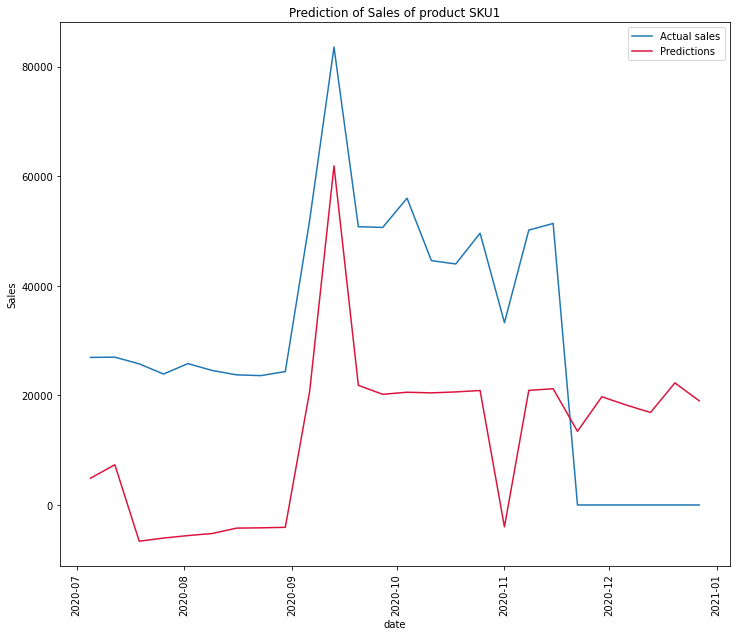

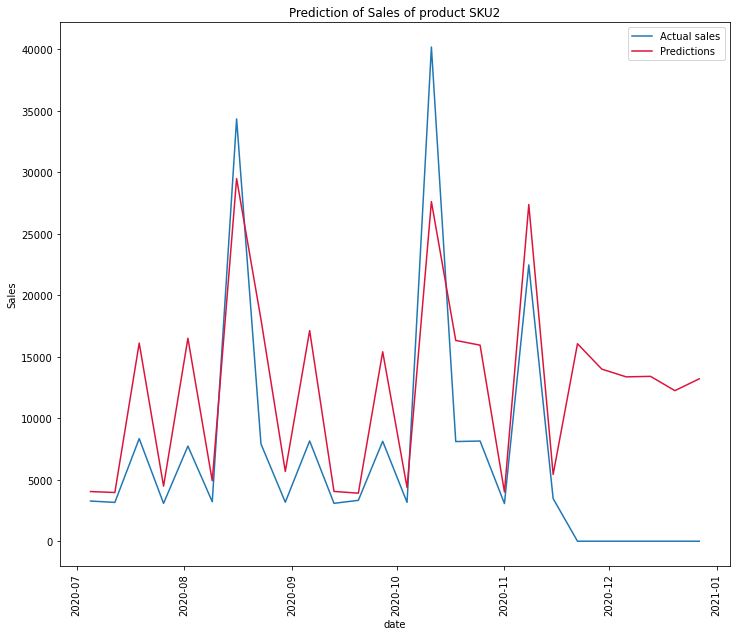

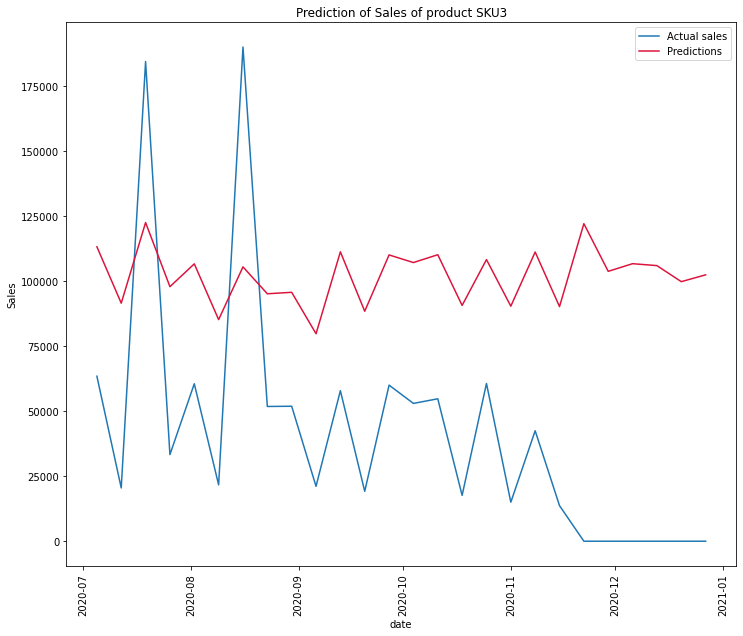

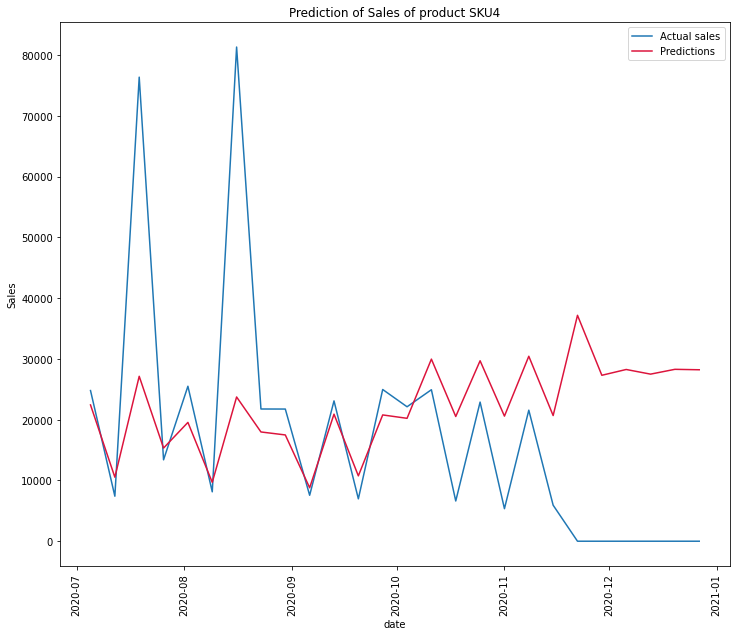

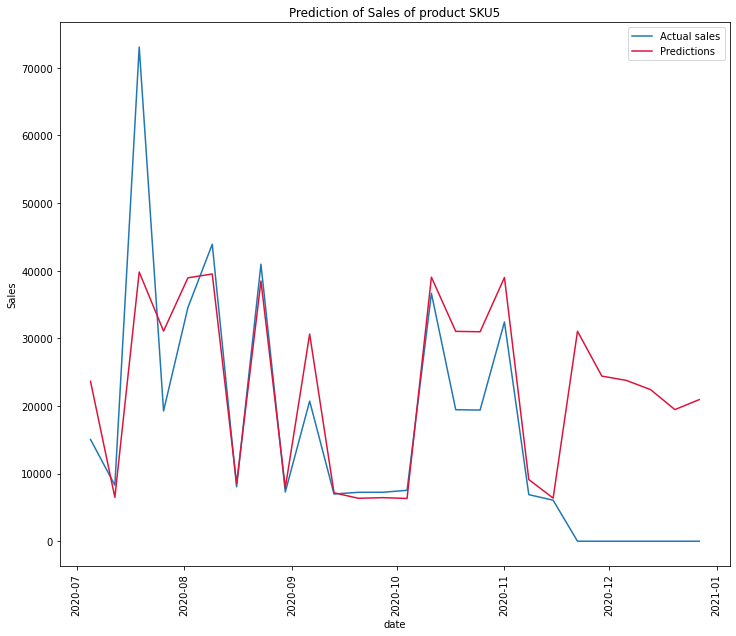

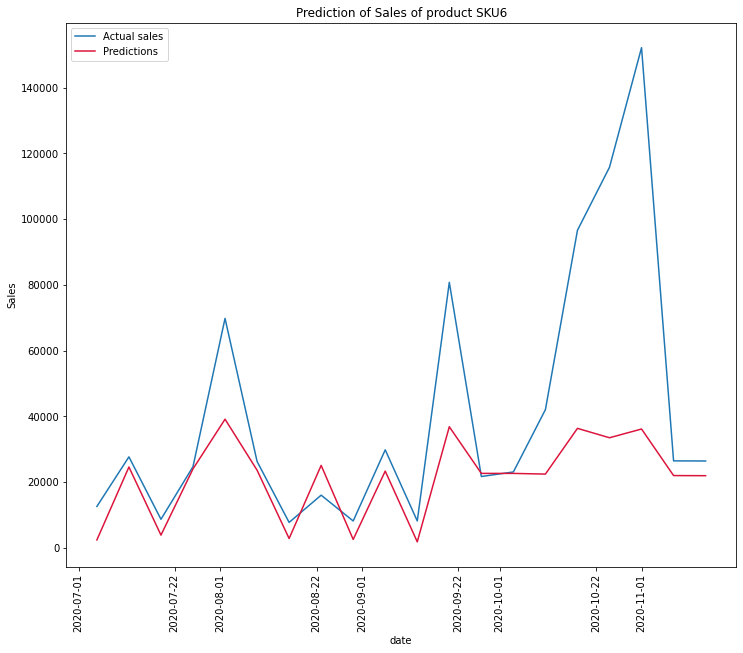

In [83]:
#import ARIMA model
#using the ARIMAX model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#creating a list of products
products=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']
#creating the mean squared error,residual sum of squares error
mse=[]
mae=[]
r2_list=[]
acc_listx=[]

for product in products:
    #Standardizing the training data
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    #scaled_pro_train=scaler.fit_transform(pro_train.drop('Product',axis=1))
    #scaled_train_set=pd.DataFrame(data=scaled_pro_train,columns=pro_train.drop('Product',axis=1).columns,index=pro_train.index)
    #Standardizing the test data
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    #scaled_pro_test=scaler.fit_transform(pro_test.drop('Product',axis=1))
    #scaled_test_set=pd.DataFrame(data=scaled_pro_test,columns=pro_test.drop('Product',axis=1).columns,index=pro_test.index)
    #Training the model 
    model=ARIMA(pro_train['Sales'],order=(1,0,0),exog=pro_train[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter']],trend='t').fit()
    #lets predict using the model 
    start=pro_test.index[0]
    end=pro_test.index[-1] 
    sales_pred=model.predict(start=start,end=end,exog=pro_test[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter']])
    #lets unstandardize the data
    #sales_predd=scaler.inverse_transform(sales_pred)
    #lets plot the actual data and the forecasts
    fig,ax=plt.subplots(figsize=(12,10))
    sns.lineplot(y=pro_test['Sales'],x=pro_test.index,ax=ax,label='Actual sales')
    sns.lineplot(y=sales_pred,x=pro_test.index,ax=ax,color='crimson',label='Predictions')
    plt.title(f'Prediction of Sales of product {product}')
    plt.xticks(rotation=90)
    plt.legend()
    #lets evaluate the model
    #calculating the mean_squared_error
    mean_s_e=mean_squared_error(pro_test['Sales'],sales_pred)
    mse.append(mean_s_e) 
    #calculating the mean_absolute_error
    mean_a_e=mean_absolute_error(pro_test['Sales'],sales_pred)
    mae.append(mean_a_e)
    #calculating the explained variance
    r2=r2_score(pro_test['Sales'],sales_pred)
    r2_list.append(r2)
    
    acc=class_forecast_accuracy(pro_test['Sales'],sales_pred)
    acc_listx.append(acc)
    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \n The class forecast is {acc}')

#creating the average for all metrics
model2_mae = np.mean(mae)
model2_mse = np.mean(mse)
model2_accuracy = np.mean(acc_listx) 
print(f'The average mean_squared_error for all the products is {np.mean(mse)} \n The average mean absolute error for all the products is {np.mean(mae)}\n The average forecast accuracy is {np.mean(acc_listx)}')   
    


    
   


In [84]:
pro_test.tail()

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,Australia_day,Anzac_day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
date,,,,,,,,,,,,,,,,,
2020-10-18,SKU6,96619,54,0,1,0,-7.56,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-10-25,SKU6,115798,52,0,1,0,-8.39,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-01,SKU6,152186,54,1,0,1,-7.43,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-08,SKU6,26445,44,1,0,1,-5.95,1,0,0,0,False,False,0.0,0.0,1.0,0.0
2020-11-15,SKU6,26414,44,0,0,0,-7.20,1,0,0,0,False,False,0.0,0.0,1.0,0.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU1 
 The mean squared error is 2644713958.065397 
 The mean absolute error is 42296.2645132195 
 The class forecast is 0.9611189814958278


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU2 
 The mean squared error is 66896205.61127749 
 The mean absolute error is 6281.964567901129 
 The class forecast is 0.9639298897767282


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU3 
 The mean squared error is 2240159054.077558 
 The mean absolute error is 34042.13896772102 
 The class forecast is 0.9572380048773472


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU4 
 The mean squared error is 312128300.9546374 
 The mean absolute error is 10770.00373775088 
 The class forecast is 0.955484665902241


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU5 
 The mean squared error is 209585803.36657208 
 The mean absolute error is 10703.843843711229 
 The class forecast is 0.9754167393165776


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


SKU6 
 The mean squared error is 1969104784.0936043 
 The mean absolute error is 31642.636476014777 
 The class forecast is 0.9267493983781127
The average mean_squared_error for all the products is 1969104784.0936043 
 The average mean absolute error for all the products is 31642.636476014777
 The average forecast accuracy is 0.9402682944402495


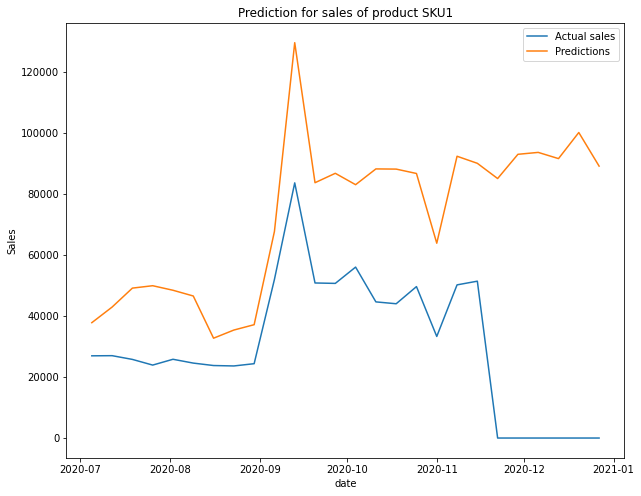

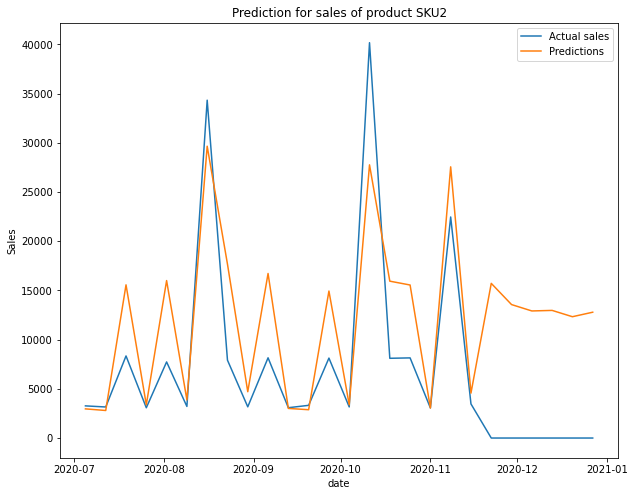

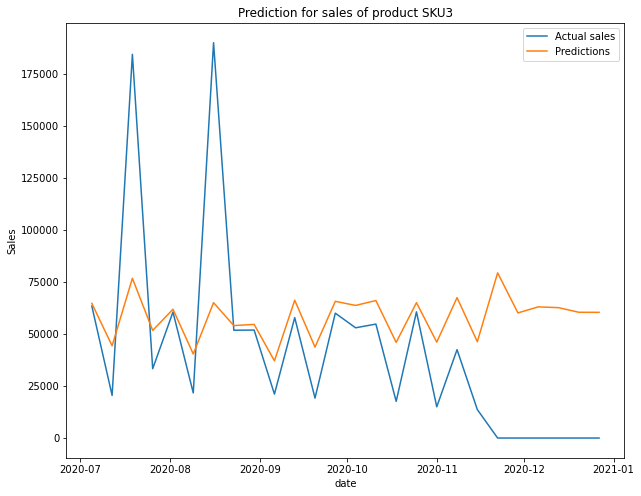

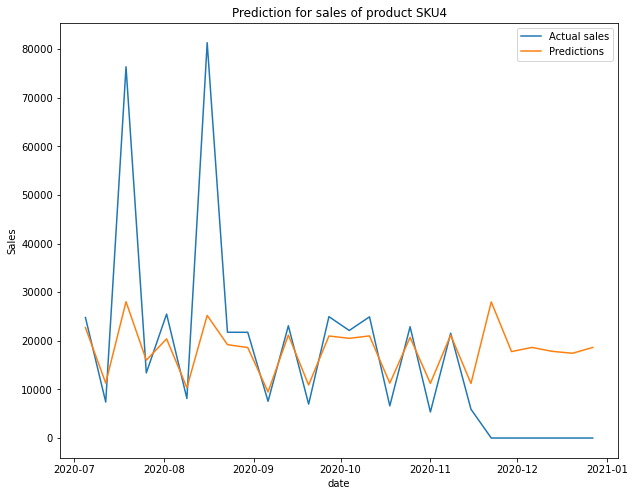

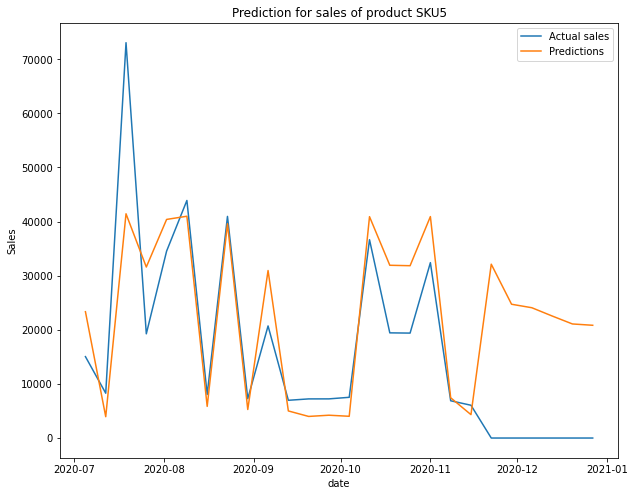

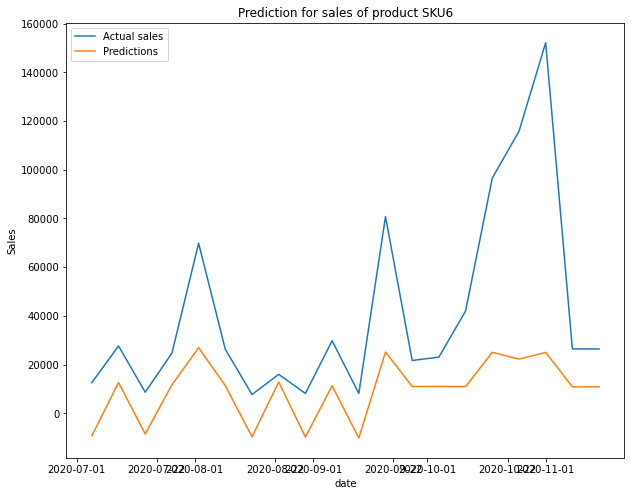

In [85]:
#using the SARIMAX model
import statsmodels.api as sm
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    sarimax_mae=[]
    sarimax_mse=[]
    sarimax_r2_score=[]
    sarimax_acc_list=[]

    model=sm.tsa.statespace.SARIMAX(pro_train['Sales'],order=(1,0,0),exog=pro_train[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']],trend='t').fit()
    sales_pred_sarimax=model.forecast(steps=len(pro_test),exog=pro_test[['Price Discount (%)','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']])
    #create the visualizations for the sarimax model
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=sales_pred_sarimax,label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    #evaluating the model
    sarimax_mae.append(mean_absolute_error(pro_test['Sales'],sales_pred_sarimax))
    sarimax_mse.append(mean_squared_error(pro_test['Sales'],sales_pred_sarimax))
    sarimax_r2_score.append(r2_score(pro_test['Sales'],sales_pred_sarimax))
    #calculating the forecast accuracy
    sarimax_acc=class_forecast_accuracy(pro_test['Sales'],sales_pred_sarimax)
    sarimax_acc_list.append(acc)
    print(f"{product} \n The mean squared error is {mean_squared_error(pro_test['Sales'],sales_pred_sarimax)} \n The mean absolute error is {mean_absolute_error(pro_test['Sales'],sales_pred_sarimax)} \n The class forecast is {sarimax_acc}")

#creating the average for all metrics
model3_mae = np.mean(sarimax_mae)
model3_mse = np.mean(sarimax_mse)
model3_accuracy = np.mean(sarimax_acc_list)     
print(f'The average mean_squared_error for all the products is {np.mean(sarimax_mse)} \n The average mean absolute error for all the products is {np.mean(sarimax_mae)}\n The average forecast accuracy is {np.mean(sarimax_acc_list)}')   
    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2700190186.5425234 
 The mean absolute error is 33857.97331441958 
The average forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 93970126.48564388 
 The mean absolute error is 5604.088944257509 
The average forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2244965816.4749117 
 The mean absolute error is 38271.35027147458 
The average forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 362411840.0199462 
 The mean absolute error is 12273.228741932944 
The average forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 304794042.8059368 
 The mean absolute error is 14352.896383703208 
The average forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU6 
 The mean squared error is 557236672.3674724 
 The mean absolute error is 19609.51798698771 
The average forecast accuracy is 1.0
The average mean_squared_error for all the products is 1043928114.1160723 
 The average mean absolute error for all the products is 20661.50927379592
The average forecast accuracy is1.0


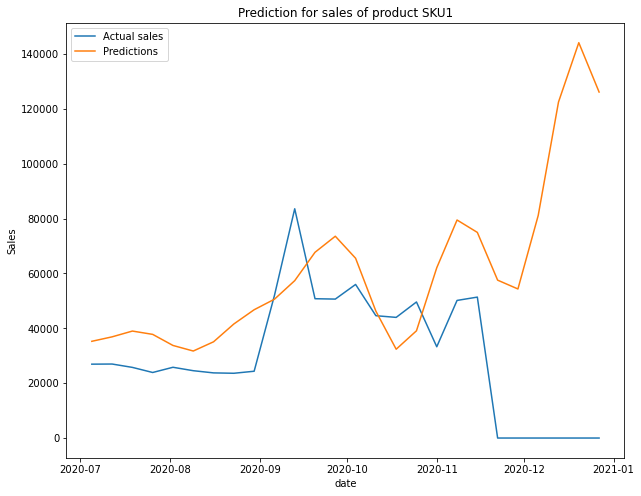

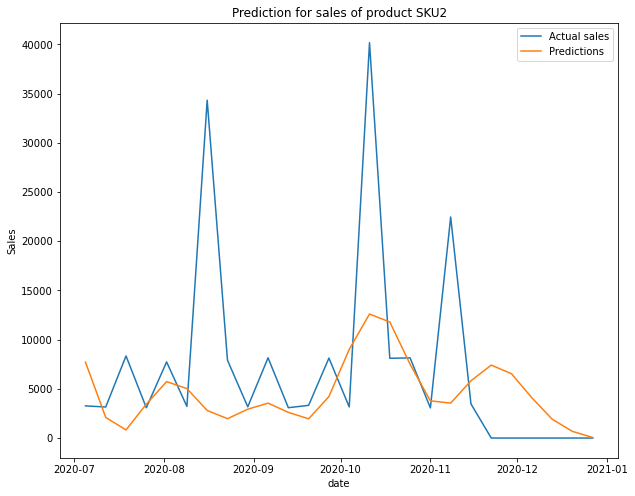

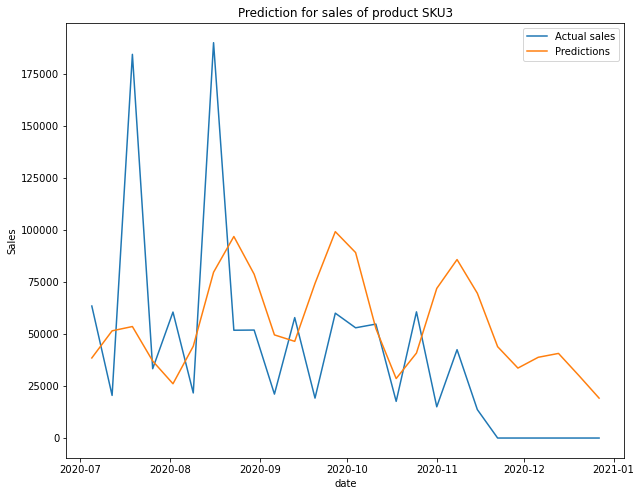

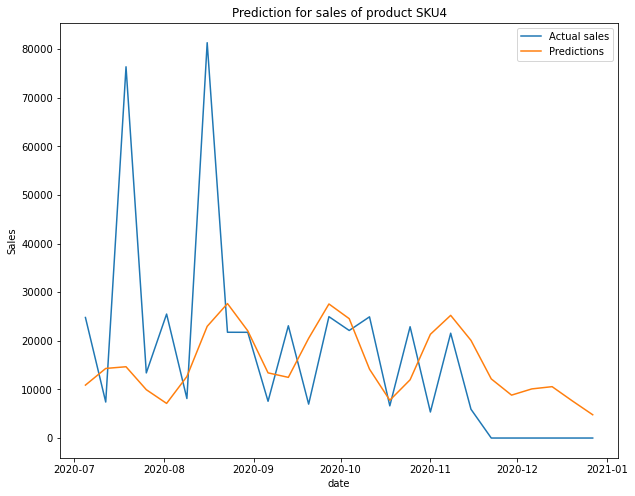

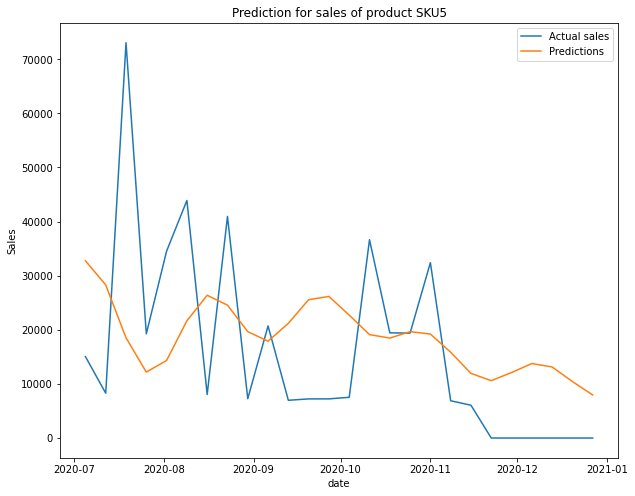

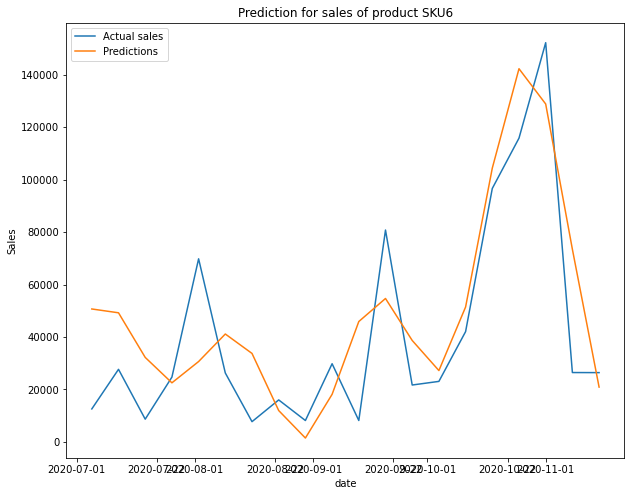

In [86]:
#using the Facebook prophet model
from fbprophet import Prophet
#creating the mean squared error,residual sum of squares error
fb_mse=[]
fb_mae=[]
fb_r2_list=[]
fb_acc_list=[]
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
    #creating an instance of the model 
    model=Prophet()
    data=pro_train.reset_index()[['date','Sales']]
    data=data.rename(columns={'date':'ds','Sales':'y'})
    model.fit(data)
    #making predictions using facebook prophet
    test_dates=pro_test.reset_index()[['date']].rename(columns={'date':'ds'})
    sales_pred=model.predict(test_dates)
    #evaluating the model
    mean_s_e=mean_squared_error(pro_test['Sales'],sales_pred['yhat'])
    mean_a_e=mean_absolute_error(pro_test['Sales'],sales_pred['yhat'])
    r2=r2_score(pro_test['Sales'],sales_pred['yhat'])
    #plotting the visualization
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=sales_pred['yhat'],label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    #putting the evaluation metric for each product in a list
    fb_mse.append(mean_s_e)
    fb_mae.append(mean_a_e)
    fb_r2_list.append(r2)

    #calculating the forecast accuracy
    acc=class_forecast_accuracy(pro_test['Sales'],sales_pred['yhat'])
    fb_acc_list.append(acc)

    print(f'{product} \n The mean squared error is {mean_s_e} \n The mean absolute error is {mean_a_e} \nThe average forecast accuracy is {acc}')

#creating the average for all metrics
model4_mae = np.mean(fb_mae)
model4_mse = np.mean(fb_mse)
model4_accuracy = np.mean(fb_acc_list) 
print(f'The average mean_squared_error for all the products is {np.mean(fb_mse)} \n The average mean absolute error for all the products is {np.mean(fb_mae)}\nThe average forecast accuracy is{np.mean(fb_acc_list)}')   
    



In [95]:
exog=pro_test[['Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2219993236.078957 
 The mean absolute error is 28969.8862402796 
The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 57781869.05074012 
 The mean absolute error is 6111.073198002967 
The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2091688339.2742162 
 The mean absolute error is 36820.41143587485 
The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 280228867.0277995 
 The mean absolute error is 11202.369113346878 
The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 157156440.12189454 
 The mean absolute error is 9076.370171826324 
The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU6 
 The mean squared error is 348596057.3268148 
 The mean absolute error is 14553.200802889158 
The class forecast accuracy is 1.0
The average mean_squared_error for all the products is 859240801.4800705 
 The average mean absolute error for all the products is 17788.885160369962
 the average accuracy is 1.0


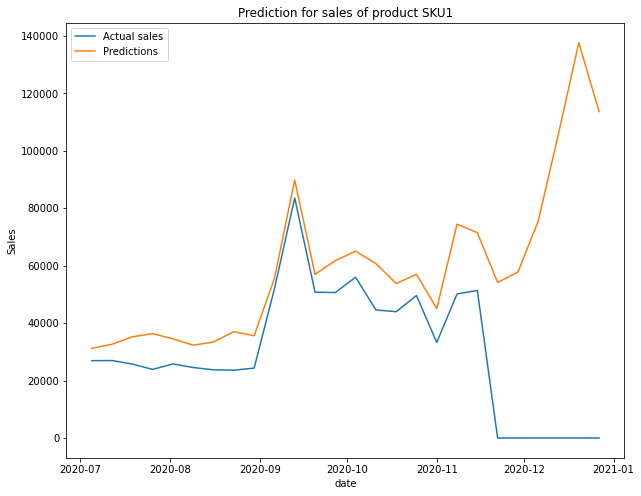

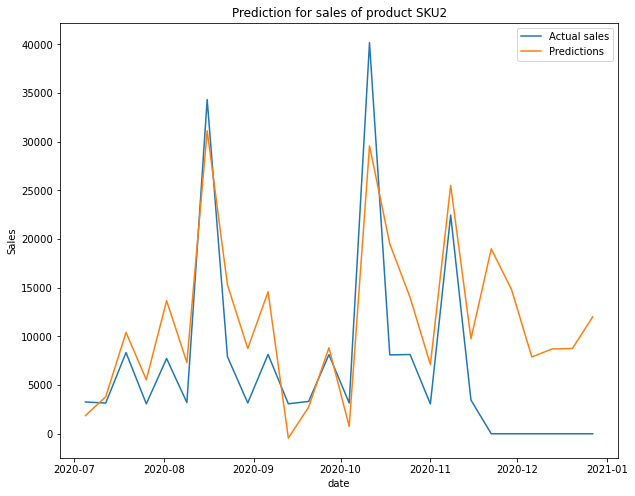

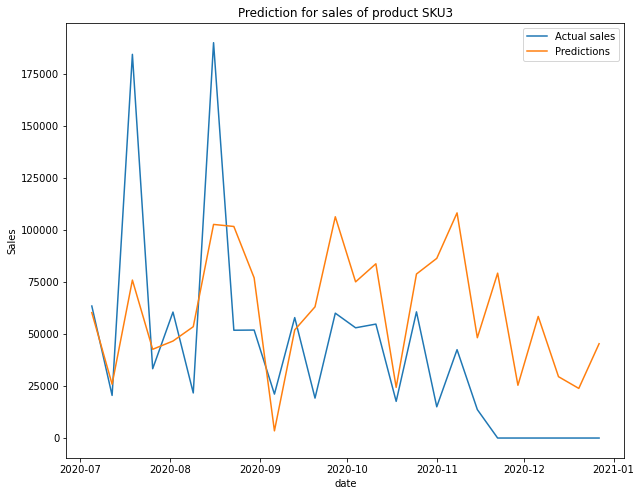

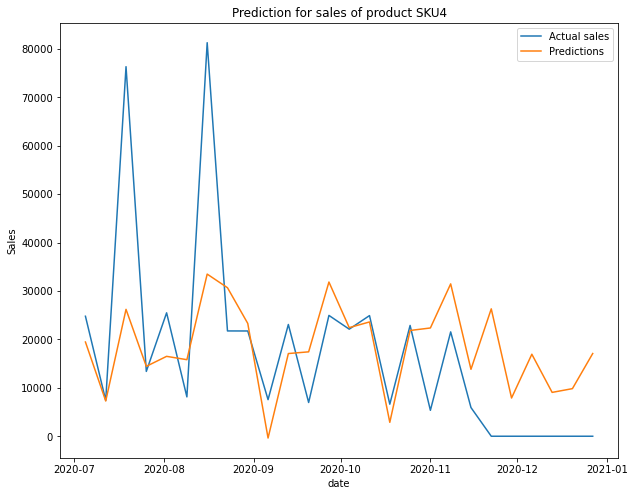

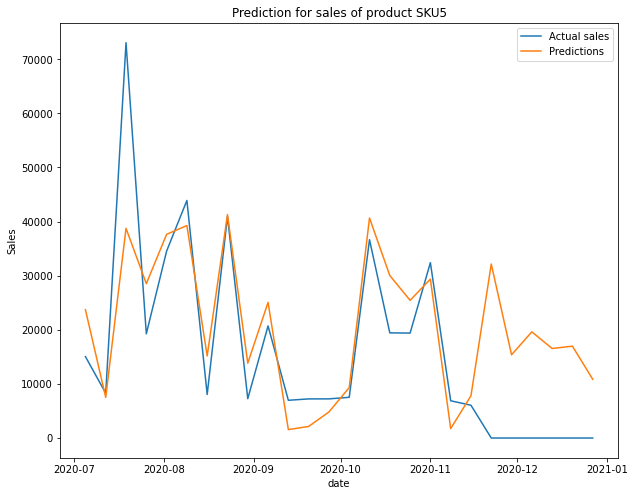

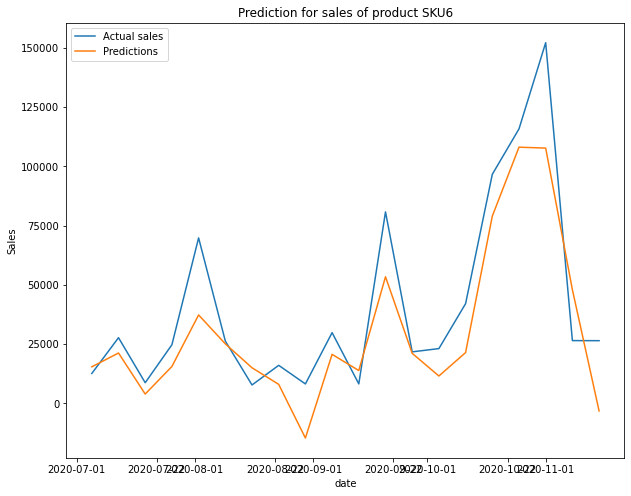

In [96]:
#Tuning the facebook prophet model with exogenous variables
#creating the mean squared error,residual sum of squares error
fbx_mse=[]
fbx_mae=[]
fbx_r2_list=[]
fbx_acc_list=[]
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    modelx=Prophet()
    for exo in exog.columns:
        modelx.add_regressor(exo)
    datax=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    modelx.fit(datax)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salesx_pred=modelx.predict(future_dates)
    mean_s_e_x=mean_squared_error(pro_test['Sales'],salesx_pred['yhat'])
    meanx_a_e=mean_absolute_error(pro_test['Sales'],salesx_pred['yhat'])
    r2x=r2_score(pro_test['Sales'],salesx_pred['yhat'])
    #plotting the visualization
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=salesx_pred['yhat'],label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")

    #calculating the forecast accuracy
    fbx_acc=class_forecast_accuracy(pro_test['Sales'],salesx_pred['yhat'])
    fbx_acc_list.append(fbx_acc)
    
    fbx_mse.append(mean_s_e_x)
    fbx_mae.append(meanx_a_e)
    fbx_r2_list.append(r2x)

    print(f'{product} \n The mean squared error is {mean_s_e_x} \n The mean absolute error is {meanx_a_e} \nThe class forecast accuracy is {fbx_acc}')

#creating the average for all metrics
model5_mae = np.mean(fbx_mae)
model5_mse = np.mean(fbx_mse)
model5_accuracy = np.mean(fbx_acc_list) 
print(f'The average mean_squared_error for all the products is {np.mean(fbx_mse)} \n The average mean absolute error for all the products is {np.mean(fbx_mae)}\n the average accuracy is {np.mean(fbx_acc_list)}')   
    



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU1 
 The mean squared error is 2347447724.373477 
 The mean absolute error is 30419.59551357583 
The class forecast accuracy is 


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU2 
 The mean squared error is 58664643.940656185 
 The mean absolute error is 6150.331660831774 
The class forecast accuracy is 


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 2045501455.852275 
 The mean absolute error is 36355.259816507765 
The class forecast accuracy is 


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 284044560.07994854 
 The mean absolute error is 11405.451211349478 
The class forecast accuracy is 


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 163542564.13332334 
 The mean absolute error is 9323.424899103555 
The class forecast accuracy is 


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU6 
 The mean squared error is 328525523.7864239 
 The mean absolute error is 14045.880225737172 
The class forecast accuracy is 
The average mean_squared_error for all the products is 871287745.3610173 
 The average mean absolute error for all the products is 17949.990554517597
The average accuracy is 1.0 


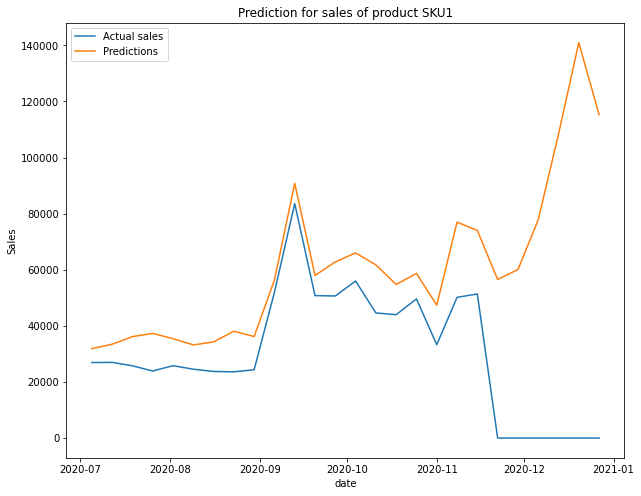

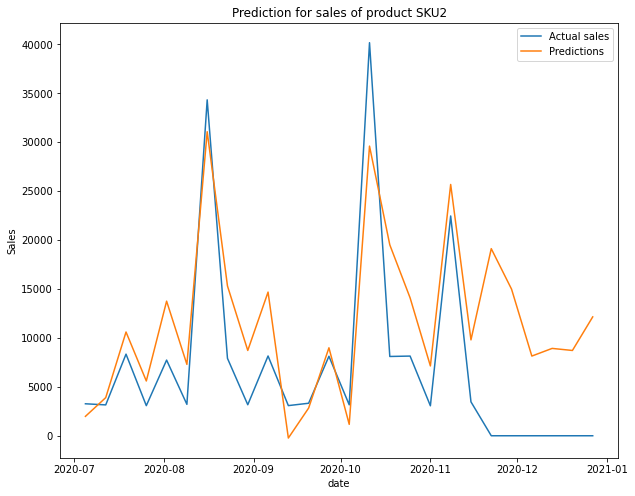

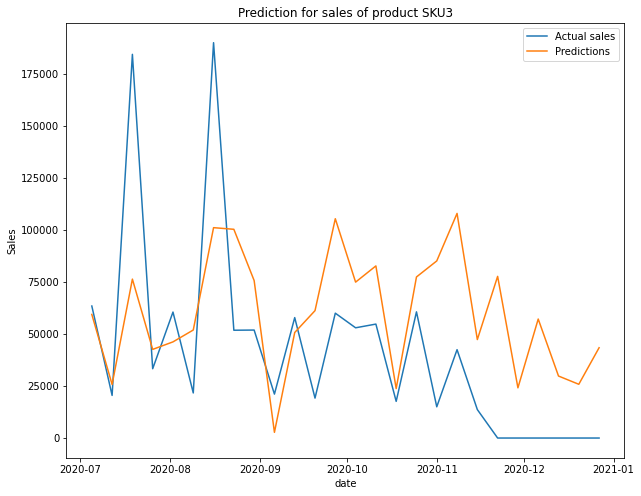

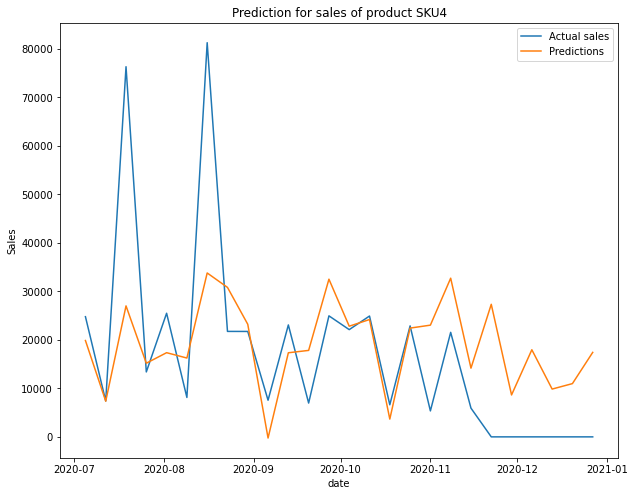

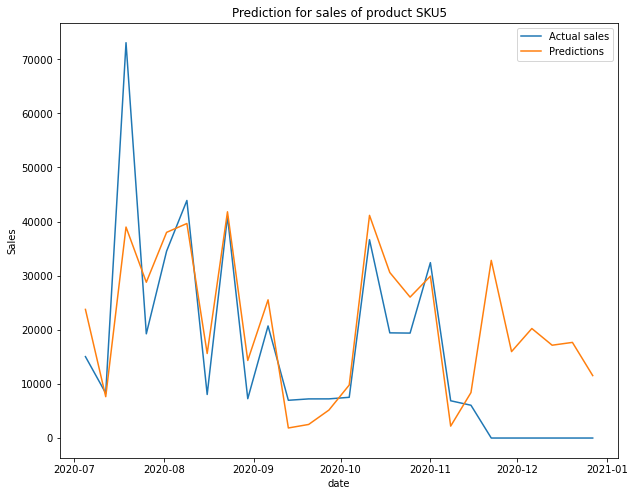

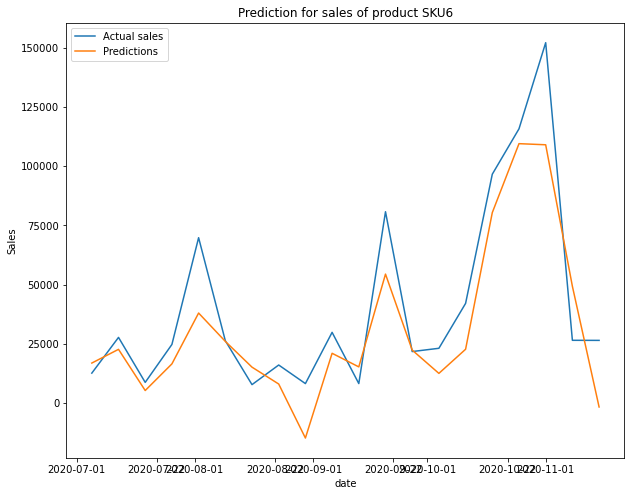

In [98]:
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae=[]
Tuned_mse=[]
Tuned_r2=[]
Tuned_acc=[]
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1)
    for exo in exog.columns:
        model_tune.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest_pred=model_tune.predict(future_dates)
    Tuned_meansex=mean_squared_error(pro_test['Sales'],salest_pred['yhat'])
    Tuned_meanxae=mean_absolute_error(pro_test['Sales'],salest_pred['yhat'])
    Tuned_r2x=r2_score(pro_test['Sales'],salest_pred['yhat'])

    #plotting the visualization
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=salest_pred['yhat'],label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    
    #calculating the forecast accuracy
    acc=class_forecast_accuracy(pro_test['Sales'],salest_pred['yhat'])
    Tuned_acc.append(acc)
    
    Tuned_mse.append(Tuned_meansex)
    Tuned_mae.append(Tuned_meanxae)
    Tuned_r2.append(Tuned_r2x)
    
    
    print(f'{product} \n The mean squared error is {Tuned_meansex} \n The mean absolute error is {Tuned_meanxae} \nThe class forecast accuracy is ')

#creating the average for all metrics
model6_mae = np.mean(Tuned_mae)
model6_mse = np.mean(Tuned_mse)
model6_accuracy = np.mean(Tuned_acc) 
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae)}\nThe average accuracy is {np.mean(Tuned_acc)} ') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 3038126299.210004 
 The mean absolute error is 34040.05870487487 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 63970822.02700692 
 The mean absolute error is 6453.542815080386 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU3 
 The mean squared error is 1709057552.9403784 
 The mean absolute error is 23486.042738513966 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU4 
 The mean squared error is 290912099.4979527 
 The mean absolute error is 10894.350086607668 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU5 
 The mean squared error is 151923760.13930255 
 The mean absolute error is 8857.538652834435 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU6 
 The mean squared error is 5378453808.397761 
 The mean absolute error is 52588.52391139463 
 The class forecast accuracy is 1.0
The average mean_squared_error for all the products is 1772074057.035401 
 The average mean absolute error for all the products is 22720.00948488433
The average accuracy is 1.0


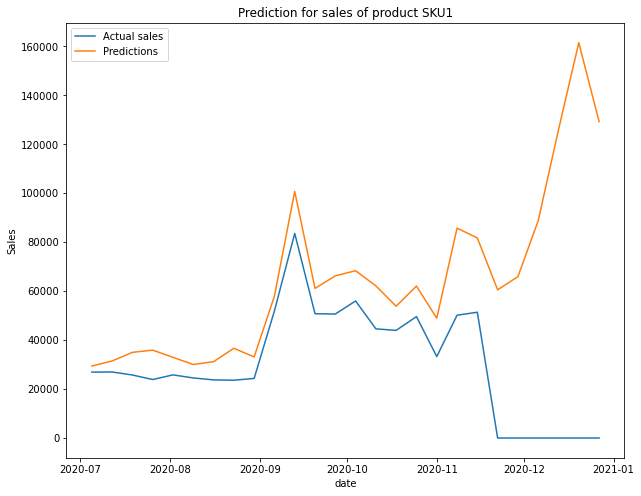

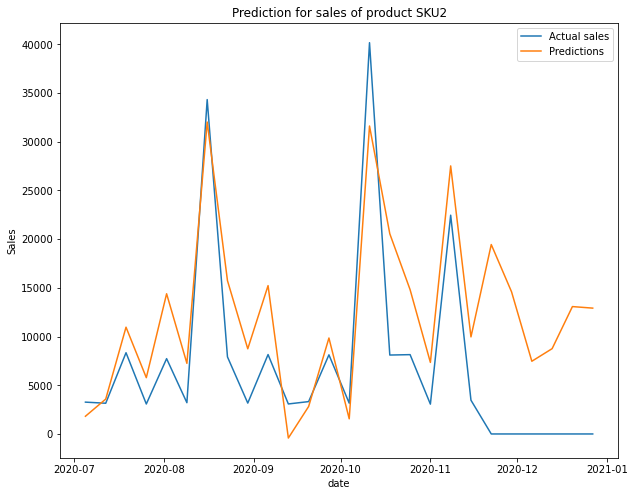

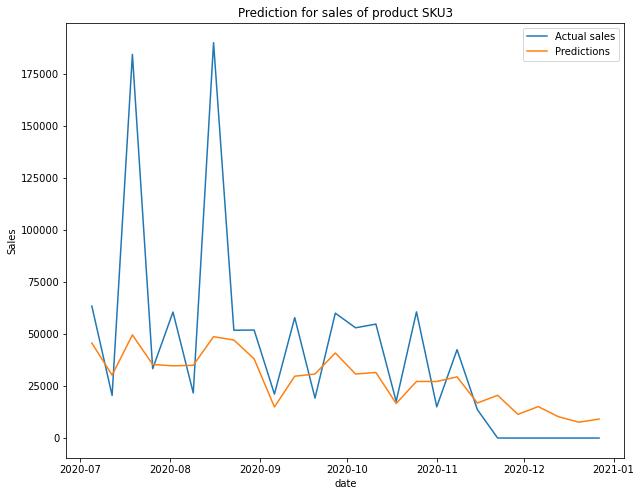

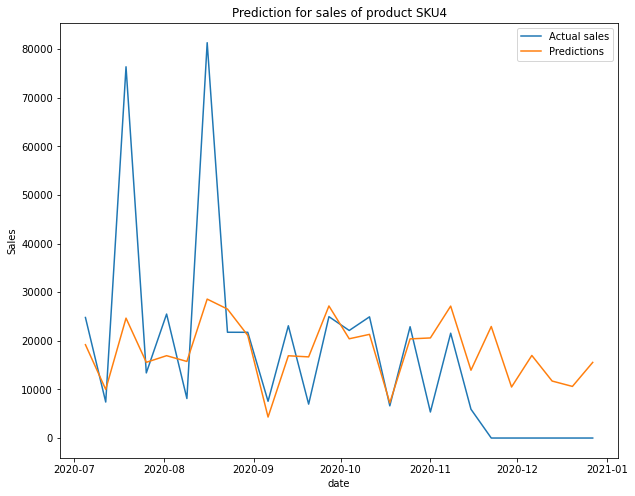

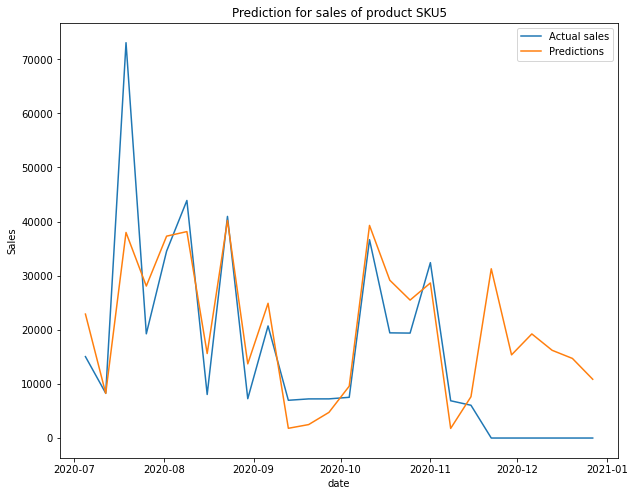

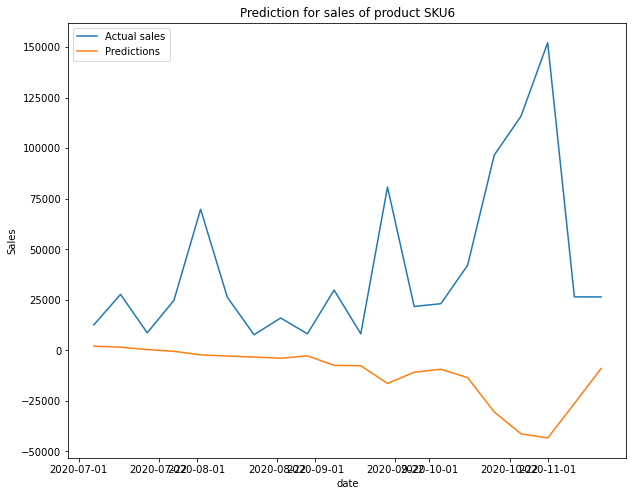

In [99]:
#more tuning on the facebook prophet model
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#change seasonality_mode to multiplicative
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae2=[]
Tuned_mse2=[]
Tuned2_r2=[]
Tuned2_acc=[]
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune2=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1,seasonality_mode='multiplicative')
    for exo in exog.columns:
        model_tune2.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune2.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest2_pred=model_tune2.predict(future_dates)
    Tuned_meansex2=mean_squared_error(pro_test['Sales'],salest2_pred['yhat'])
    Tuned_meanxae2=mean_absolute_error(pro_test['Sales'],salest2_pred['yhat'])
    Tuned2_r2x=r2_score(pro_test['Sales'],salest2_pred['yhat'])
    
    #plotting the visualization
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=salest2_pred['yhat'],label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    
    #calculating the forecast accuracy
    acc=class_forecast_accuracy(pro_test['Sales'],salest2_pred['yhat'])
    Tuned2_acc.append(acc)

    Tuned_mse2.append(Tuned_meansex2)
    Tuned_mae2.append(Tuned_meanxae2)
    Tuned2_r2.append(Tuned2_r2x)
    
    print(f'{product} \n The mean squared error is {Tuned_meansex2} \n The mean absolute error is {Tuned_meanxae2} \n The class forecast accuracy is {acc}')

#creating the average for all metrics
model7_mae = np.mean(Tuned_mae2)
model7_mse = np.mean(Tuned_mse2)
model7_accuracy = np.mean(Tuned2_acc) 
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse2)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae2)}\nThe average accuracy is {np.mean(Tuned2_acc)}') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU1 
 The mean squared error is 2348554314.719173 
 The mean absolute error is 30419.850700224866 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SKU2 
 The mean squared error is 57136713.64377283 
 The mean absolute error is 6033.53242874026 
 The class forecast accuracy is 1.0


c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU3 
 The mean squared error is 2098693157.1428125 
 The mean absolute error is 37209.08177060519 
 The class forecast accuracy is 1.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU4 
 The mean squared error is 284056455.49450743 
 The mean absolute error is 11437.009944355039 
 The class forecast accuracy is 1.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU5 
 The mean squared error is 160838463.71277267 
 The mean absolute error is 9223.611641686086 
 The class forecast accuracy is 1.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


SKU6 
 The mean squared error is 331280913.723086 
 The mean absolute error is 14079.640750058208 
 The class forecast accuracy is 1.0
The average mean_squared_error for all the products is 880093336.4060208 
 The average mean absolute error for all the products is 18067.121205944943
The average accuracy  is 1.0


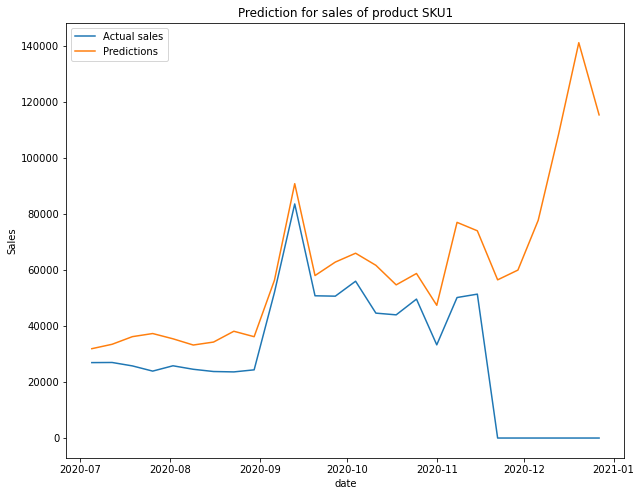

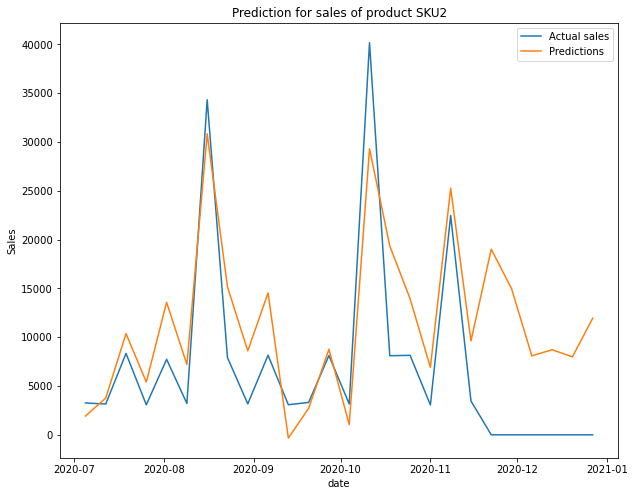

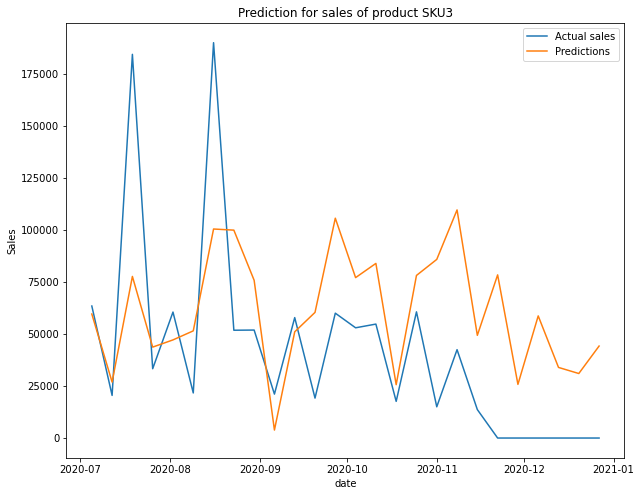

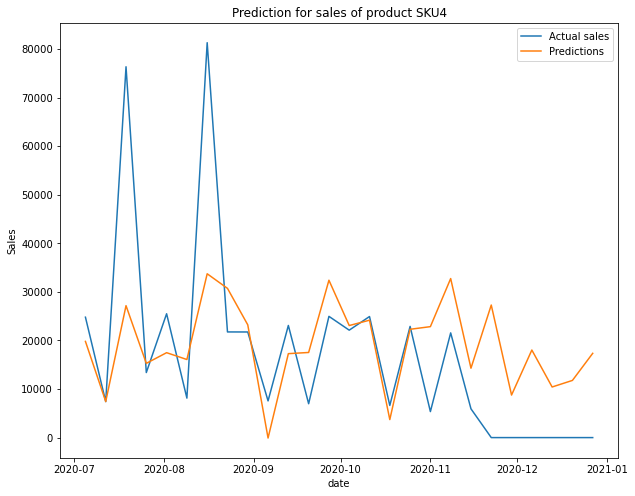

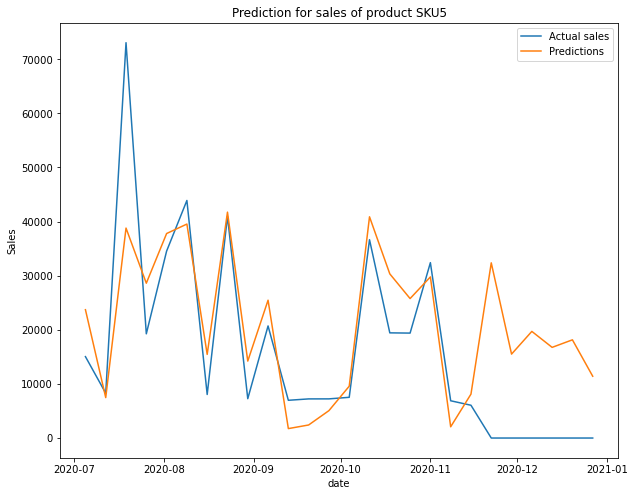

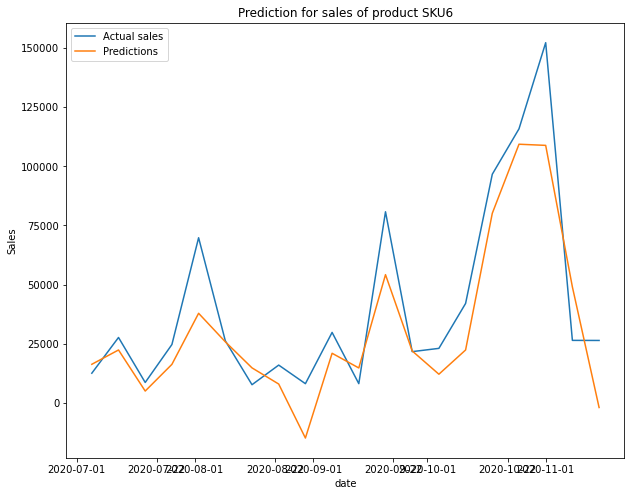

In [100]:
#More tuning on the facebook prophet model
#Tuning facebook prophet model
#change the seasonality_prior_scale to 20
#change holiday_prior_scale to 20
#and change_point_prior_scale to improve the flexibility of the model
Tuned_mae3=[]
Tuned_mse3=[]
Tuned3_r2=[]
Tuned3_acc=[]
for product in products:
    pro_train=train_set.loc[train_set['Product']==product].set_index('date')
    pro_test=test_set.loc[test_set['Product']==product].set_index('date')
#instantiate the model    
    model_tune3=Prophet(seasonality_prior_scale=20,changepoint_prior_scale=0.1,holidays_prior_scale=20)
#add the holidays for australia     
    model_tune3.add_country_holidays(country_name='AU')
#add the exogenous variables for more accuracy
    for exo in exog.columns:
        model_tune3.add_regressor(exo)
    datat=pro_train.reset_index().rename(columns={'Sales':'y','date':'ds'})[['ds','y','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']]    
    model_tune3.fit(datat)
    future_dates=pro_test.reset_index()[['date','Price Discount (%)','In-Store Promo','Catalogue Promo','Store End Promo','Google_Mobility','Covid_Flag','VALENTINES','EASTER','CHRISTMAS']].rename(columns={'date':'ds'})    
    salest3_pred=model_tune3.predict(future_dates)
    Tuned_meansex3=mean_squared_error(pro_test['Sales'],salest3_pred['yhat'])
    Tuned_meanxae3=mean_absolute_error(pro_test['Sales'],salest3_pred['yhat'])
    Tuned3_r2x=r2_score(pro_test['Sales'],salest3_pred['yhat'])

    #plotting the visualization
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(x=pro_test.index,y=pro_test['Sales'],label='Actual sales',ax=ax)
    sns.lineplot(x=pro_test.index,y=salest3_pred['yhat'],label='Predictions')
    plt.legend()
    plt.title(f"Prediction for sales of product {product}")
    
    #calculating the forecast accuracy
    tuned_acc=class_forecast_accuracy(pro_test['Sales'],salest3_pred['yhat'])
    Tuned3_acc.append(tuned_acc)
    
    Tuned_mse3.append(Tuned_meansex3)
    Tuned_mae3.append(Tuned_meanxae3)
    Tuned3_r2.append(Tuned3_r2x)
    
    print(f'{product} \n The mean squared error is {Tuned_meansex3} \n The mean absolute error is {Tuned_meanxae3} \n The class forecast accuracy is {tuned_acc}')
   
#creating the average for all metrics
model8_mae = np.mean(Tuned_mae3)
model8_mse = np.mean(Tuned_mse)
model8_accuracy = np.mean(Tuned3_acc) 
print(f'The average mean_squared_error for all the products is {np.mean(Tuned_mse3)} \n The average mean absolute error for all the products is {np.mean(Tuned_mae3)}\nThe average accuracy  is {np.mean(Tuned3_acc)}') 

## Evaluation

In [101]:
models_mae=[model1_mae,model2_mae,model3_mae,model4_mae,model5_mae,model6_mae,model7_mae,model8_mae]
models_mse=[model1_mse,model2_mse,model3_mse,model4_mse,model5_mse,model6_mse,model7_mse,model8_mse]
models_accuracy=[model1_accuracy,model2_accuracy,model3_accuracy,model4_accuracy,model5_accuracy,model6_accuracy,model7_accuracy,model8_accuracy]

eval_data={'models_accuracy':models_accuracy,'models_mae':models_mae,'models_mse':models_mse}
eval_dta=pd.DataFrame(eval_data,index=['Arima','Arimax','Sarima ','Sarimax_','Base FacebookProphet','Facebookprophet_exog','Tuned Fb prophet_exog ','Tuned Fb prophet_exog_holiday'])
eval_dta

,models_accuracy,models_mae,models_mse
Arima,0.915414,25407.287636,1.574203e+09
Arimax,0.956446,24940.944824,1.399026e+09
Sarima,0.940268,31642.636476,1.969105e+09
Sarimax_,1.000000,20661.509274,1.043928e+09
Base FacebookProphet,1.000000,17788.885160,8.592408e+08
Facebookprophet_exog,1.000000,17949.990555,8.712877e+08
Tuned Fb prophet_exog,1.000000,22720.009485,1.772074e+09
Tuned Fb prophet_exog_holiday,1.000000,18067.121206,8.712877e+08


Based on the models accuracy we will use the Facebookprophet exogenous model which is model6. 
 We will use the model to predict results for the last quarter Q3-Q4 for 2020 for all products

## Conclusion

Based on the analysis we see that:
* SKU1,SKU3 has the highest sales every year
* SKU2 had lowest sales every year
* July has the most Sales every year

We picked the facebook prophet model with exogenous variables i.e model_tune 

The model demostrated a good forecast accuracy of 1 which means that it is almost close to perfect with the least mean absolute error

The major limitation was working with limited data for different products each being modelled separately.The other limitation is just trying out more models

Based on our findings, we recommend that the company use the facebook prophet model(model_tune) to inform their decision-making around inventory management and production planning, and to continue to refine and improve the model over time

## Next steps

* To use deep learning models that is RNNs and LSTMs to train the data for better accuracy
* To scale the facebook prophet model to be able to handle big data
* To do more analysis on the data 
* To deploy the model